# Анализ продажей автомобилей в Казахстане

### Цели работы:

- Очистить данные для того, чтобы можно проводить с ними работу в рарзличных направлениях

Дополнительная цель:
- Исследовать положение на рынке дилера MercurAuto

### Задачи:

- Предобработка данных;
- Исследовательский анализ данных;
- Анализ рынка автомобилей Казахстана;
- Анализ позиции Меркур Авто: внутренная и внешняя среда.

### Задания для работы:

Анализ рынка (делим на коммерческий и некоммерческий транспорт):
- Емкость рынка автомобилей: в денежном и количественном выражении;
- Марки лидеры на рынке автомобилей;
- Динамика рынка: общая, по сегментам;
- Продажи автомобилей в разрезе бренд / сегмент;
- Продажи по маркам;
- Продажи по регионам;
- Проверить гипотезу: стоимость автомобиля зависит от уровня развития региона (средней заработной платы по региону);
- Продажи автоцентров;
- Модели-лидеры на рынке.

Анализ положения Меркур Авто:
- Выручка: общая, по маркам, средняя, ежемесячная, ежемесячная по маркам;
- Продажи по регионам: общие, по маркам;
- Конкурентный анализ.

### Состав данных:

- **`Год`** – год продажи (2019)
- **`Месяц`** – месяц продажи (январь - сентябрь)
- **`Компания`** – название автоцентра
- **`Бренд`** – название продаваемой марки автомобиля
- **`Модель`** – название модели автомобиля
- **`Модификация`** – модификация модели автомобиля (удаляем)
- **`Год выпуска`** – год производства автомобиля
- **`Страна-производитель`** – страна, где произведен автомобиль
- **`Вид топлива`** – бензин, дизель, электричество, гибрид
- **`Объём двиг л`** – объем двигателя автомобиля в литрах
- **`Коробка передач`** – тип коробки переключения передач (оставляем два варианта: автоматическая, механическая, то есть все что не механика ставим автомат, на DSG, S-Tronic и прочее делить не надо, равно как и количество передач)
- **`Тип привода`** – в итоге оставляем RWD – задний привод, FWD – передний привод, 4WD – полный привод, 2WD – все остальное (подключаемый полный привод и где нет четкого указания передний или задний это привод)
- **`Сегмент`** – сегмент, к которому относится авто (удаляем)
- **`Регион`** – регион продажи
- **`Наименование дилерского центра`** – совпадает с компанией – можно удалить
- **`Тип клиента`** – юридическое или физическое лицо (в рамках анализа не критично – можно удалить)
- **`Форма расчета`** – наличный и безналичный расчет (много пропусков – можно удалять)
- **`Количество`** – количество автомобилей в заказе
- **`Цена USD`** – цена автомобиля
- **`Продажа USD`** – цена заказа (цена авто умноженная на количество и за вычетом скидок если есть)
- **`Область`** – область продажи
- **`Сегментация 2013`** – сегмент автомобиля актуальный
- **`Класс 2013`** – класс автомобиля актуальный
- **`Сегментация Eng`** – английская сегментация (удаляем)
- **`Локализация производства`** – удаляем (совпадает со страной производителем)

Признаки-категории:
- сегмент
- класс
- тип привода
- коробка передач


## Загрузка и предобработка данных

In [1]:
# Импорт библиотек

import pandas as pd
from io import BytesIO
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from scipy.stats import spearmanr

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

sns.set_style("whitegrid")

In [2]:
spreadsheet_id = '1odW0BVXLasbS1hIN2HwrLxfr34NYpapoXX1w8Zc8t5U'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
df = pd.read_csv(BytesIO(r.content))

In [3]:
# Заменяю строчные NaN на пропуски

df = df.replace("NaN", pd.NA, regex=True)

### Изменение типов данных

In [4]:
# Проверяю типы данных, чтобы сразу исправить, если тип определился некорретно.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39966 entries, 0 to 39965
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Год                             39966 non-null  int64  
 1   Месяц                           39966 non-null  object 
 2   Компания                        39966 non-null  object 
 3   Бренд                           39966 non-null  object 
 4   Модель                          39966 non-null  object 
 5   Модификация                     36375 non-null  object 
 6   Год выпуска                     39465 non-null  object 
 7   Страна-производитель            39966 non-null  object 
 8   Вид топлива                     36826 non-null  object 
 9   Объём двиг, л,                  35708 non-null  object 
 10  Коробка передач                 36711 non-null  object 
 11  Тип привода                     35677 non-null  object 
 12  Сегмент                         

In [5]:
# Удаляю столбцы, которые не пригодятся для работы. (Делерский центр и Компания это одно и тоже, оставляем только Компанию)

df.drop(['Наименование дилерского центра', 'Форма расчета', 'Сегментация 2013', 'Локализация производства', 'Сегментация Eng'], axis=1, inplace=True)

In [6]:
# Заменяем пробелы на нижнее подчеркивание в названиях столбцов
df.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)

In [7]:
# Переименовывыю столбцы. Сознательно не стал переводить столбцы на английский, так как не увидел в данном случае практического смысла.

df = df.rename(columns={'Объём_двиг,_л,': 'Объём_двиг_литры',  \
           'Цена,_USD': 'Цена_USD', 'Продажа,_USD': 'Цена_заказа_USD'})


В следующий столбцах буду менять тип.

- `Год`
- `Объём двиг, л,`
- `Год выпуска`
- `Количество`
- `Цена, USD`
- `Продажа, USD`

In [8]:
# Смотрю уникальные значения. Есть значения, которые нужно обработать.
df['Год_выпуска'].unique()

array(['2018', '2017', '2019', nan, '2016', '2014', '2013', '2011',
       '2\xa0018', '2\xa0019'], dtype=object)

In [9]:
# Заменяю пробелы и привожу к числовому формату

df['Год_выпуска'] = pd.to_numeric(df['Год_выпуска'] \
                                  .str.replace(r'\s+', '', regex=True), errors='coerce')

# Привожу в целочисленный формат

df['Год_выпуска'] = df['Год_выпуска'].astype('Int64')

# Проверка  (все получилось, года стали целыми числами)

df['Год_выпуска'].unique()

<IntegerArray>
[2018, 2017, 2019, <NA>, 2016, 2014, 2013, 2011]
Length: 8, dtype: Int64

In [10]:
# Проверяем уникальные значения столбца Количество. Можно изменить тип данных.

df['Количество'].unique()

array([  1.,   2.,   4.,   3.,   7.,   5.,   8.,  10.,   6.,   9.,  11.,
        19.,  12.,  70.,  29.,  18.,  37.,  17.,  15.,  24.,  14.,  13.,
        25.,  63.,  23.,  30.,  21.,  60.,  nan,  22.,  16.,  35.,  28.,
        32.,  54., 115.,  46.,  33.,  47.,  20.,  66.,  27.,  50.,  36.,
        26.,  31.,  34.,  40.,  43.,  51.,  42.,  38.,  41., 100.,  -1.,
        79.,  62.])

In [11]:
# Привожу к целочисленному значению

df['Количество'] = df['Количество'].astype('Int64')

# В процессе увидел одно отрицательное значение. Не стал удалять, просто поменял минус на +.

df.loc[df['Количество'] == -1, 'Количество'] = 1

# Проверка

df['Количество'].unique()

<IntegerArray>
[   1,    2,    4,    3,    7,    5,    8,   10,    6,    9,   11,   19,   12,
   70,   29,   18,   37,   17,   15,   24,   14,   13,   25,   63,   23,   30,
   21,   60, <NA>,   22,   16,   35,   28,   32,   54,  115,   46,   33,   47,
   20,   66,   27,   50,   36,   26,   31,   34,   40,   43,   51,   42,   38,
   41,  100,   79,   62]
Length: 56, dtype: Int64

In [12]:
# Заменяю точки на запятые и привожу в формат чисел

df['Цена_USD'] = df['Цена_USD'].str.replace(',', '.').astype(float)

In [13]:
# Тоже самое для другого столбца с ценами

df['Цена_заказа_USD'] = df['Цена_заказа_USD'].str.replace(',', '.').astype(float)

In [14]:
# Смотрю уникальные значения в столбце с объемым двигателя

df['Объём_двиг_литры'].unique()

array(['1,4', '2', '3', '4,4', '6,6', '1,5', '1,596', '2,4', '1,7',
       '26,7', '25,7', '24,7', '23,7', '22,7', '21,7', '20,7', '19,7',
       '18,7', '17,7', '16,7', '15,7', '14,7', '13,7', '12,7', '11,7',
       '10,7', '9,7', '8,7', '7,7', '6,7', '5,7', '4,7', '3,7', '2,7',
       '6,2', '1,4 Turbo', '2,5', '1,6', nan, '2,8', '4,3', '4,3,',
       '1,6 MPI', '2,0 MPI', '2,4 GDI', '2,4 MPI', '2,5 CRDI VGT',
       '2,5 CRDI WGT', '3,9', '7,5', '12,3', '1,6 T-GDI', '2,0 CRDI',
       '2.0', '3,5', '5,6', '5,2', '3,0 L', '1.6', '1.5', '5', '1,598',
       '1,248', '1,998', '2,359', '1,999', '3,342', '1,591', '3,47',
       '1,69', '1,774', '2.5', '2.7', '3.5', '4.6', '4,6', '5.7', '1,8',
       '10,5', '4', '5,5', '12', '12,8', '11', '2,2', '1,2', '1,485',
       'MT', 'AT', '0', '13', '1,33', '#Н/Д', '4.0', '2.4G', '2,4G',
       '2.8', '2,693', '2,0', '3,8', '3.8', '1,2T', '3,6', '7,6', '4,9',
       '2.0h', '2,9', '400 Л.С.', '4,98 L,', '4,98', '88 KWH', '8,4 L,',
       '6,7L', 

Встречаются как Кв/ч, что относится скорее всего к электрокарам, также есть и просто некорректные значения или не обднообразные. Этот столбец буду править поэтапно.

In [15]:
# Проверяю, действительно ли это электрокары.

df.query("Объём_двиг_литры == '400 Л.С.' | Объём_двиг_литры == '88 KWH'")

,Год,Месяц,Компания,Бренд,Модель,Модификация,Год_выпуска,Страна-производитель,Вид_топлива,Объём_двиг_литры,Коробка_передач,Тип_привода,Сегмент,Регион,Тип_клиента,Количество,Цена_USD,Цена_заказа_USD,Область,Класс_2013
39544,2019,Февраль,Almaty Motors Premium,Jaguar,I-Pace,ЭЛЕКТРОКАР,2019,UK,Электро,400 Л.С.,РЕДУКТОР,4WD,SUV,Алматы,Физ. Лицо,1,117236.97,117236.97,г.Алматы,Компактные SUV
39545,2019,Апрель,Almaty Motors Premium,Jaguar,I-Pace,ЭЛЕКТРОКАР,2019,UK,Электро,400 Л.С.,РЕДУКТОР,4WD,SUV,Алматы,Физ. Лицо,1,105388.79,105388.79,г.Алматы,Компактные SUV
39546,2019,Июнь,Almaty Motors Premium,Jaguar,I-Pace,ЭЛЕКТРОКАР,2019,UK,Электро,400 Л.С.,РЕДУКТОР,4WD,SUV,Алматы,Юр. Лицо,1,120413.28,120413.28,г.Алматы,Компактные SUV
39818,2019,Июль,Allur Auto,ANKAI,HFF6124G03EV3,Bus,2019,Республика Казахстан,Электричество,88 KWH,NaN,2WD,автобус,Костанай,Юр. Лицо,1,307986.36,307986.36,Костанайская область,Большие автобусы
39819,2019,Июль,Allur Auto,ANKAI,HFF6124G03EV3,Bus,2019,Республика Казахстан,Электричество,88 KWH,NaN,2WD,автобус,Костанай,Юр. Лицо,1,307986.36,307986.36,Костанайская область,Большие автобусы
39820,2019,Июль,Allur Auto,ANKAI,HFF6124G03EV3,Bus,2019,Республика Казахстан,Электричество,88 KWH,NaN,2WD,автобус,Костанай,Юр. Лицо,1,307986.36,307986.36,Костанайская область,Большие автобусы
39821,2019,Июль,Allur Auto,ANKAI,HFF6124G03EV3,Bus,2019,Республика Казахстан,Электричество,88 KWH,NaN,2WD,автобус,Костанай,Юр. Лицо,1,307986.36,307986.36,Костанайская область,Большие автобусы
39822,2019,Июль,Allur Auto,ANKAI,HFF6124G03EV3,Bus,2019,Республика Казахстан,Электричество,88 KWH,NaN,2WD,автобус,Костанай,Юр. Лицо,1,307986.36,307986.36,Костанайская область,Большие автобусы
39823,2019,Июль,Allur Auto,ANKAI,HFF6124G03EV3,Bus,2019,Республика Казахстан,Электричество,88 KWH,NaN,2WD,автобус,Костанай,Юр. Лицо,1,307986.36,307986.36,Костанайская область,Большие автобусы
39824,2019,Июль,Allur Auto,ANKAI,HFF6124G03EV3,Bus,2019,Республика Казахстан,Электричество,88 KWH,NaN,2WD,автобус,Костанай,Юр. Лицо,1,307986.36,307986.36,Костанайская область,Большие автобусы


In [16]:
# Проверяю есть ли ещё электрокары с другим названием.

df['Вид_топлива'].unique()

array(['Бензин', 'Дизель', nan, 'дизель', 'бензин', 'гибрид', '2', '1,6',
       '0', 'Электро', 'Электричество'], dtype=object)

In [17]:
# Привожу значения к однообразию

df['Вид_топлива'] = df['Вид_топлива'].replace('Электро', 'Электричество')

In [18]:
# Выше было замечено, что в виде топлива, есть уникальные значения похожие на объем двигателя. Сразу проверю.

df.query("Вид_топлива == '2' | Вид_топлива == '1,6' | Вид_топлива == '0'").head()

,Год,Месяц,Компания,Бренд,Модель,Модификация,Год_выпуска,Страна-производитель,Вид_топлива,Объём_двиг_литры,Коробка_передач,Тип_привода,Сегмент,Регион,Тип_клиента,Количество,Цена_USD,Цена_заказа_USD,Область,Класс_2013
23723,2019,Январь,Renault Россия,Renault,Duster,E2GB4AG,2019,Российская Федерация,2,MT,4WD,4WD,0,Уральск,NaN,1,12249.61,12249.61,Западно-Казахстанская область,Субкомпактные SUV
23724,2019,Январь,Renault Россия,Renault,Duster,E2GB4AGA,2018,Российская Федерация,2,AT,4WD,4WD,0,Нур-Султан,NaN,1,12249.61,12249.61,г.Нур-Султан,Субкомпактные SUV
23725,2019,Январь,Renault Россия,Renault,Duster,E2GB4AGA,2018,Российская Федерация,2,AT,4WD,4WD,0,Нур-Султан,NaN,1,12249.61,12249.61,г.Нур-Султан,Субкомпактные SUV
23726,2019,Январь,Renault Россия,Renault,Duster,E2GB4AGA,2018,Российская Федерация,2,AT,4WD,4WD,0,Кызылорда,NaN,1,12249.61,12249.61,Кызылординская область,Субкомпактные SUV
23727,2019,Январь,Renault Россия,Renault,Duster,E2GB4AG,2018,Российская Федерация,2,MT,4WD,4WD,0,Караганда,NaN,1,12249.61,12249.61,Карагандинская область,Субкомпактные SUV


In [19]:
# Сохраняем индексы строк, которые удовлетворяют условию
indices_to_shift = df.query("Вид_топлива == '2' | Вид_топлива == '1,6' | Вид_топлива == '0'").index

# Производим сдвиг только в нужных строках и столбцах
df.loc[indices_to_shift, ['Вид_топлива', 'Объём_двиг_литры', \
                          'Коробка_передач']] = df.loc[indices_to_shift, \
                           ['Вид_топлива', 'Объём_двиг_литры', 'Коробка_передач']].shift(1, axis=1)

In [20]:
# Проверяем. Всё получилось, пропуски буду заполнять позже.

print(df['Вид_топлива'].unique())
df.query('Бренд == "Renault" & Модель == "Duster"').head()

['Бензин' 'Дизель' nan 'дизель' 'бензин' 'гибрид' None 'Электричество']


,Год,Месяц,Компания,Бренд,Модель,Модификация,Год_выпуска,Страна-производитель,Вид_топлива,Объём_двиг_литры,Коробка_передач,Тип_привода,Сегмент,Регион,Тип_клиента,Количество,Цена_USD,Цена_заказа_USD,Область,Класс_2013
23723,2019,Январь,Renault Россия,Renault,Duster,E2GB4AG,2019,Российская Федерация,None,2,MT,4WD,0,Уральск,NaN,1,12249.61,12249.61,Западно-Казахстанская область,Субкомпактные SUV
23724,2019,Январь,Renault Россия,Renault,Duster,E2GB4AGA,2018,Российская Федерация,None,2,AT,4WD,0,Нур-Султан,NaN,1,12249.61,12249.61,г.Нур-Султан,Субкомпактные SUV
23725,2019,Январь,Renault Россия,Renault,Duster,E2GB4AGA,2018,Российская Федерация,None,2,AT,4WD,0,Нур-Султан,NaN,1,12249.61,12249.61,г.Нур-Султан,Субкомпактные SUV
23726,2019,Январь,Renault Россия,Renault,Duster,E2GB4AGA,2018,Российская Федерация,None,2,AT,4WD,0,Кызылорда,NaN,1,12249.61,12249.61,Кызылординская область,Субкомпактные SUV
23727,2019,Январь,Renault Россия,Renault,Duster,E2GB4AG,2018,Российская Федерация,None,2,MT,4WD,0,Караганда,NaN,1,12249.61,12249.61,Карагандинская область,Субкомпактные SUV


In [21]:
# Заменяю на 0 объем двигатерля у электрокаров (возможно временно)

df['Объём_двиг_литры'] = df['Объём_двиг_литры'].replace(['400 Л.С.', '88 KWH'], 0)

In [22]:
# Временно заменяю #Н/Д на 9999 как заглушку, так как далее я буду удалять буквы

df['Объём_двиг_литры'] = df['Объём_двиг_литры'].replace({'#Н/Д': 9999}, regex=True)

In [23]:
# Убираю все буквы
# Замена запятых на точки
# Удаление пробелов
# Удаляю точки в конце строки

df['Объём_двиг_литры'] = df['Объём_двиг_литры'].str.replace(r'[^\d,]', '', regex=True) \
.str.replace(',', '.').str.replace(r'\s+', '', regex=True).astype(str).apply(lambda x: re.sub(r'\.+\s*$', '', x))


In [24]:
# Обработка 'nan'
df['Объём_двиг_литры'] = df['Объём_двиг_литры'].replace({'nan': np.nan})

In [25]:
# На всякий случай, а то не получалось избавится от лишнего в конце.
df['Объём_двиг_литры'] = df['Объём_двиг_литры'].str.strip()

In [26]:
# Ручное округление некоторых значений (Смылс в том, чтобы окрулить так как я считаю нужным исходя из популярных объемов двигателя)

df['Объём_двиг_литры'] = df['Объём_двиг_литры'] \
.replace({'1.596': 1.6, '1.598': 1.6, '1.248': 1.25, \
           '1.998': 2, '1.998': 2, '2.359': 2.4, \
           '1.999': 2, '3.342': 3.34, '1.591': 1.6, \
           '1.69': 1.7, '1.774': 1.8, '1.485': 1.5, \
           '2.693': 2.7}, regex=True)

In [27]:
# Приведение значений к числовому типу

df['Объём_двиг_литры'] = pd.to_numeric(df['Объём_двиг_литры'], errors='coerce')

Явно видны моменты, где например вместо 2 литров, указано 20 литров. Сразу исправлю объем двигателей у некоторых моделей.

In [28]:
df.loc[df['Объём_двиг_литры'] > 13, 'Объём_двиг_литры'] /= 10


In [29]:
# В процессе очистки столбца `Объём_двиг_литры` нашёл  повторы в модификации и сразу сделал однообразное значение.

df.loc[(df['Модель'] == 'RX') & df['Модификация'].str.contains('3ROW'), 'Модификация'] = '3ROW MB'

In [30]:
df['Объём_двиг_литры'].unique()


array([ 1.4 ,  2.  ,  3.  ,  4.4 ,  6.6 ,  1.5 ,  1.6 ,  2.4 ,  1.7 ,
        2.67,  2.57,  2.47,  2.37,  2.27,  2.17,  2.07,  1.97,  1.87,
        1.77,  1.67,  1.57,  1.47,  1.37, 12.7 , 11.7 , 10.7 ,  9.7 ,
        8.7 ,  7.7 ,  6.7 ,  5.7 ,  4.7 ,  3.7 ,  2.7 ,  6.2 ,  2.5 ,
         nan,  2.8 ,  4.3 ,  3.9 ,  7.5 , 12.3 ,  3.5 ,  5.6 ,  5.2 ,
        5.  ,  1.25,  3.34,  3.47,  1.8 ,  4.6 , 10.5 ,  4.  ,  5.5 ,
       12.  , 12.8 , 11.  ,  2.2 ,  1.2 , 13.  ,  1.33,  0.  ,  3.8 ,
        3.6 ,  7.6 ,  4.9 ,  2.9 ,  4.98,  8.4 ,  6.5 ])

Результат очистки столбца `Объём_двиг_литры` удовлетворил. Почему-то в списке уникальных значений видно пробелы, но потом понял, что это нули, то есть сами значения корректны и находятся в формате float.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39966 entries, 0 to 39965
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Год                   39966 non-null  int64  
 1   Месяц                 39966 non-null  object 
 2   Компания              39966 non-null  object 
 3   Бренд                 39966 non-null  object 
 4   Модель                39966 non-null  object 
 5   Модификация           36375 non-null  object 
 6   Год_выпуска           39465 non-null  Int64  
 7   Страна-производитель  39966 non-null  object 
 8   Вид_топлива           36786 non-null  object 
 9   Объём_двиг_литры      35691 non-null  float64
 10  Коробка_передач       36711 non-null  object 
 11  Тип_привода           35677 non-null  object 
 12  Сегмент               33205 non-null  object 
 13  Регион                39966 non-null  object 
 14  Тип_клиента           32919 non-null  object 
 15  Количество         

Все столбцы приведены к нужному типу данных.

### Заполнение пропусков, поиск дубликатов

In [32]:
print(f"Дубликатов {df.duplicated().sum()}")

Дубликатов 20829


Такое количество дубликатов обусловлено тем, что в таблице нет каких-то ID(например сделки) Удалять их не буду, так как потеряем много данных.

In [33]:
# Для наглядности отображаю количество пропусков по столбцам, чтобы было понятно с какими столбцами нужно работать.

df.isnull().mean(axis=0).sort_values(ascending=False)

Тип_клиента            0.18
Сегмент                0.17
Тип_привода            0.11
Объём_двиг_литры       0.11
Модификация            0.09
Коробка_передач        0.08
Вид_топлива            0.08
Год_выпуска            0.01
Количество             0.00
Регион                 0.00
Область                0.00
Цена_заказа_USD        0.00
Цена_USD               0.00
Год                    0.00
Месяц                  0.00
Страна-производитель   0.00
Модель                 0.00
Бренд                  0.00
Компания               0.00
Класс_2013             0.00
dtype: float64

#### Столбец: объем двигателя

In [34]:
# Проверяю для каких моделей больше всего пропусков в столбце Объём_двиг_литры

df[df['Объём_двиг_литры'].isna()]['Модель'].value_counts(ascending=False).reset_index() \
.rename({'index': 'Модель', 'Модель': 'Количество'}).head(15)

,index,Модель
0,Duster,650
1,Sandero,435
2,Nexia R3,361
3,Logan,320
4,65115,259
5,Kaptur,230
6,43118,188
7,S3,175
8,3302,127
9,S5,117


In [35]:
# Сохраняю модели в переменную в виде списка для будущего использования.
engine_nan = df[df['Объём_двиг_литры'].isna()]['Модель'].value_counts(ascending=False).reset_index()['index'].tolist()

In [36]:
# Также делаю это для модификаций

engine_nan_mod = df[df['Объём_двиг_литры'].isna()]['Модификация'].value_counts().reset_index()['index'].tolist()

In [37]:
# Сохаряняю уникальные модификации для некоторых моделей для того, чтобы потом ссылаться на эти списки при заполнении пропусков

gas_3302 = df.query('Модель == "3302"')['Модификация'].unique().tolist()
gas_2705 = df.query('Модель == "2705"')['Модификация'].unique().tolist()
gas_next = df.query('Модель == "Next"')['Модификация'].unique().tolist()

In [38]:
# Заполняю пропуски с помощью ранее подготовленных списков.
# Суть в том, чтобы взять модель с пропусками из одного списка и модификацию из другого,
# которая принадлежит этой же модели и тем самым добиться бОльшей точности в заполнении.

df.loc[df['Модификация'].isin(gas_next) & df['Модель'].isin(engine_nan), 'Объём_двиг_литры'] = 2.7
df.loc[df['Модификация'].isin(gas_3302) & df['Модификация'].isin(engine_nan_mod), 'Объём_двиг_литры'] = 2.7
df.loc[df['Модификация'].isin(gas_2705) & df['Модификация'].isin(engine_nan_mod), 'Объём_двиг_литры'] = 2.8


In [39]:
# C помощью данного кода, я просто визуально просматривал какие данные я имею по той или иной модели, подставляя разные значения.

#df.query('Модель == "2310"')
# df.query('Модель == "2705"')['Модификация'].unique()

# Код закомментирован, так как он не требуется для исполнения и был временным инструментом

In [40]:
# Заполяю пропуски в топовых по пропускам моделях

df.loc[df['Модель'] == '3741', 'Объём_двиг_литры'] = 2.7
df.loc[df['Модель'] == 'Niva', 'Объём_двиг_литры'] = 1.7
df.loc[df['Модификация'] == 'GAZ 2705', 'Объём_двиг_литры'] = 2.7
df.loc[(df['Модель'] == 'Aveo') | (df['Модель'] == 'Vesta') \
       | (df['Модель'] == 'Granta') | (df['Модель'] == 'Sandero') \
       | (df['Модель'] == 'Logan') | (df['Модель'] == 'Kaptur') \
       | (df['Модель'] == 'Arkana') | (df['Модель'] == 'S3'), 'Объём_двиг_литры'] = 1.6
df.loc[df['Модель'] == 'BJ3253DMPKB-AD', 'Объём_двиг_литры'] = 9.7
df.loc[(df['Модель'] == '58815Z') | (df['Модель'] == '43118'), 'Объём_двиг_литры'] = 10.8
df.loc[df['Модель'] == 'Nexia R3', 'Объём_двиг_литры'] = 1.5
df.loc[(df['Модель'] == 'Duster') | (df['Модель'] == 'S5'), 'Объём_двиг_литры'] = 2
df.loc[df['Модель'] == '65115', 'Объём_двиг_литры'] = 6.7
df.loc[(df['Модель'] == '6520') |(df['Модель'] == '45143'), 'Объём_двиг_литры'] = 11.8
df.loc[df['Модификация'] == 'Isuzu NMR85', 'Объём_двиг_литры'] = 8.7



In [41]:
# Смотрю что осталось по пропускам

df[df['Объём_двиг_литры'].isna()]['Модель'].value_counts().head(10)

HFF6850G       54
65116          53
CX-5           51
44108          45
D-MAX          44
SX3258DR384    43
HD 78          38
N120           34
Dokker         34
5490           32
Name: Модель, dtype: int64

In [42]:
# Создаю таблицу где считаю моду  объема двигателя для сегментов

mode_engine = df.groupby('Сегмент')['Объём_двиг_литры'] \
.agg(lambda x: x.mode().iloc[0] if not x.mode().empty else pd.NA).reset_index() \
.rename(columns={'Объём_двиг_литры': 'mode'})

# Удаляю пропуски для того, чтобы далее использовать эту таблицу для заполнения пропусков в основной таблице (df)
mode_engine = mode_engine.dropna()

# Для таблицы нам нужны только те сегменты на которые можно опереться, поэтому фильтрую
mode_engine = mode_engine.query('Сегмент != "0" & Сегмент != "#Н/Д"')

# Привожу к числовому формату столбец с модой
mode_engine['mode'] = mode_engine['mode'].astype(float)

mode_engine.head(10)

,Сегмент,mode
4,5 door,2.00
5,5 doors,2.00
6,5doors,2.00
7,A класс,1.25
8,ASTER Auto,1.60
10,B,1.60
11,B класс,1.60
12,B-SUV,1.60
13,Bus,4.98
14,C,1.60


In [43]:
# Функция производит замену пропусков в ['Объём_двиг_литры'] главной таблице значениями(модой)
# из таблицы mode_engine при соответсвии условий.


df['Объём_двиг_литры'] = df.apply(
    lambda row: mode_engine.loc[
        mode_engine['Сегмент'] == row['Сегмент'], 'mode'].values[0]
        if pd.isna(row['Объём_двиг_литры']) and
           not mode_engine.loc[mode_engine['Сегмент'] == row['Сегмент'], 'mode'].empty
        else row['Объём_двиг_литры'],
    axis=1
)


In [44]:
# Смотрю количество пропусков в столбцах

df.isnull().mean(axis=0).sort_values(ascending=False)

Тип_клиента            0.18
Сегмент                0.17
Тип_привода            0.11
Модификация            0.09
Коробка_передач        0.08
Вид_топлива            0.08
Объём_двиг_литры       0.01
Год_выпуска            0.01
Количество             0.00
Регион                 0.00
Область                0.00
Цена_заказа_USD        0.00
Цена_USD               0.00
Год                    0.00
Месяц                  0.00
Страна-производитель   0.00
Модель                 0.00
Бренд                  0.00
Компания               0.00
Класс_2013             0.00
dtype: float64

По итогу работы со столбцом `Объём_двиг_литры`
- было  11 %
- стало 1 %

#### Столбец: тип клиента

In [45]:
# Превидение столбца к нижнему регистру

df['Тип_клиента'] = df['Тип_клиента'].str.lower()
df['Тип_клиента'].unique()

array(['физ. лицо', 'юр. лицо', nan, 'юр.лицо', 'физ.лицо', 'юридическое',
       'физическое', 'физлицо', 'юрлицо', 'корп. клиент'], dtype=object)

In [46]:
# Функция для категоризации типа клиентов, а точнее приведение к однообразному виду существующих категорий
def categorize(value):
    if pd.notna(value) and 'физ' in value:
        return 'физ_лицо'
    elif pd.notna(value):
        return 'юр_лицо'
    else:
        return value

# Применяем функцию к столбцу 'Тип_клиента'
df['Тип_клиента'] = df['Тип_клиента'].apply(categorize)

# Проверяю
df['Тип_клиента'].unique()

array(['физ_лицо', 'юр_лицо', nan], dtype=object)

In [47]:
# Данная функция заполняет пропуски в столбце Тип_клиента в зависимости от количества машин в заказе
# на основе допущения, что более двух авто покупают юр лица

def fill_na(row):
    if pd.isna(row['Тип_клиента']):
        if pd.notna(row['Количество']):
            if row['Количество'] > 2:
                return 'юр_лицо'
            elif 1 <= row['Количество'] <= 2:
                return 'физ_лицо'
    return row['Тип_клиента']

# Применяем функцию к df
df['Тип_клиента'] = df.apply(fill_na, axis=1)


In [136]:
# Проверка

df.isnull().mean(axis=0).sort_values(ascending=False)

Сегмент                0.17
Модификация            0.09
Объём_двиг_литры       0.01
Год_выпуска            0.01
Тип_клиента            0.00
Количество             0.00
Тип_рынка              0.00
Дата_продажи           0.00
Тип                    0.00
Класс_2013             0.00
Область                0.00
Цена_заказа_USD        0.00
Цена_USD               0.00
Год                    0.00
Регион                 0.00
Месяц                  0.00
Тип_привода            0.00
Коробка_передач        0.00
Вид_топлива            0.00
Страна-производитель   0.00
Модель                 0.00
Бренд                  0.00
Компания               0.00
ЗП_средняя             0.00
dtype: float64

По итогу работы со столбцом `Тип_клиента`
- было 18%
- стало менее 1%

#### Столбец: тип привода

In [49]:
df['Тип_привода'].unique()

array(['передний', 'FWD', 'quattro', 'Задний', 'Полный', 'AWD',
       'Передний', '4WD', '4х2.2', nan, 'RWD', '2 WD', '2WD', '4 WD',
       '4X4', '4х4', '4x4', '4x2', '4х2', '4X2', 'Астана',
       'Передний (FF)', '0', 'FF', '#Н/Д', 'полный', '4Motion'],
      dtype=object)

In [50]:
# Привожу столбец к нижнему регистру

df['Тип_привода'] = df['Тип_привода'].str.lower()
df['Тип_привода'].unique()

array(['передний', 'fwd', 'quattro', 'задний', 'полный', 'awd', '4wd',
       '4х2.2', nan, 'rwd', '2 wd', '2wd', '4 wd', '4x4', '4х4', '4x2',
       '4х2', 'астана', 'передний (ff)', '0', 'ff', '#н/д', '4motion'],
      dtype=object)

In [51]:
# Функция, которая наводит порядок в категориях приводя все имеющиеся категоии к однообразному виду

def categorize_2(value):
    if value == 'передний' or value == 'ff' or value == 'передний (ff)':
        return 'fwd'
    elif value == 'задний':
        return 'rwd'
    elif value == 'полный' or value == '4motion' \
    or value == 'quattro' or value == '4wd' or value == '4x4' \
    or value == '4х4':
        return '4wd'
    elif value == '4х2.2' or value == '2 wd'  \
    or value == '4x2' or value == '4х2':
        return '2wd'
    else:
        return 'unknown'

# Применяем функцию к столбцу 'Тип_привода'
df['Тип_привода'] = df['Тип_привода'].apply(categorize_2)

In [52]:
df['Тип_привода'].unique()

array(['fwd', 'unknown', '4wd', 'rwd', '2wd'], dtype=object)

In [53]:
df['Тип_привода'].value_counts()

unknown    13858
4wd        11453
fwd         8040
2wd         5146
rwd         1469
Name: Тип_привода, dtype: int64

Осталось достаточно много пропусков в столбце Тип_привода, с ним пока не будут продолжать работать более плотно. Заполнил их на `unknown`

Пропуски: коробка передач

In [54]:
df['Коробка_передач'].unique()

array(['S-tronic', 'S-Tronic', 'Tiptronic', 'АКПП', 'АКП', 'Steptronic',
       'AT', '6 АТ', '5 МТ', '6АТ', 'MT', '8AT', '5МТ', 'Powershift S6',
       '6AT', nan, 'Мех.', '6 AT', '6 MT', '6MT', '5 AT', '5AT', 'МКПП',
       '7 DCT', '7DCT', '8 AT', 'МТ', 'CVT', 'DCT', '4 АТ', '6 МТ', '6МТ',
       '4АТ', '4AT', '8АТ', '8 АТ', '5MT', 'AMT', 'CVT (вариатор)',
       'CVT (вариATор)', 'CVT(вAриATор)', '7G-TRONIC', '9G-TRONIC',
       '12AT', '12АТ', '5АТ', '7АТ', '7AT', '6M/T', 'PDK', '8-ступ АКПП',
       '8', '8АКПП', '8 АКПП Tiptronic S', '7 АКПП (PDK)', '7 АКПП PDK',
       '8 АКПП (PDK)', 'АТ', 'АT', 'МT', '0', '7 DSG', '7DSG', '6 DSG',
       '6DSG', '#Н/Д', '2,693', 'DSG', '6A', '6А', '5M', 'A/T', 'M/T',
       'МКП', '5М', 'М/T', '7 АКП', '7АКП', 'А/T', '8A', 'TDI', '9AT',
       'РЕДУКТОР'], dtype=object)

In [55]:
# Очистка значений столбца

df['Коробка_передач'] = df['Коробка_передач'].str.replace(r'\d', '', regex=True).str.strip()

In [56]:
# Механическая
mt = ['M', 'M/T', 'МT', 'MT', 'МТ',  'М/T', 'МКП', 'МКПП', 'М', 'M/T', 'Мех.']
#  Автоматическая
at = ['АКПП', 'АКП', 'AT', 'АТ', 'Steptronic', 'Tiptronic', '8 АКПП Tiptronic S', \
      'G-TRONIC', '-ступ АКПП', 'АКПП Tiptronic S', 'А/T', 'A', 'А', 'АT', 'A/T']
# Робот
amt = ['AMT', 'PDK', 'Powershift S', 'S-tronic', 'S-Tronic', 'АКПП PDK', 'АКПП (PDK)', 'DSG', 'DCT']
# Вариатор
cvt = ['CVT', 'CVT (вариатор)', 'CVT (вариATор)', 'CVT(вAриATор)']

In [57]:
# Функция для приведения к однообразному виду значения из столца ['Коробка_передач']

def categorize_3(value):
    if value in mt:
        return 'механическая'
    elif value in at:
        return 'автоматическая'
    elif value in amt:
        return 'робот'
    elif value in cvt:
        return 'вариатор'
    else:
        return 'unknown'


# Применяем функцию к столбцу 'Коробка_передач'
df['Коробка_передач'] = df['Коробка_передач'].apply(categorize_3)

In [58]:
# Проверяем

df['Коробка_передач'].unique()

array(['робот', 'автоматическая', 'механическая', 'unknown', 'вариатор'],
      dtype=object)

#### Стобец: вид топлива

In [59]:
df['Вид_топлива'] = df['Вид_топлива'].str.lower()
df['Вид_топлива'] = df['Вид_топлива'].fillna('unknown')

In [60]:
df['Вид_топлива'].unique()

array(['бензин', 'дизель', 'unknown', 'гибрид', 'электричество'],
      dtype=object)

In [61]:
df.isnull().sum(axis=0).sort_values(ascending=False)

Сегмент                 6761
Модификация             3591
Объём_двиг_литры         503
Год_выпуска              501
Количество                 6
Тип_клиента                6
Год                        0
Область                    0
Цена_заказа_USD            0
Цена_USD                   0
Регион                     0
Коробка_передач            0
Тип_привода                0
Месяц                      0
Вид_топлива                0
Страна-производитель       0
Модель                     0
Бренд                      0
Компания                   0
Класс_2013                 0
dtype: int64

#### Столбец: компания

In [62]:
# Код просто для того, чтобы более удобно и по алфавиту посмотреть названия компаний

df.groupby('Компания')['Цена_заказа_USD'].sum().reset_index().sort_values(by='Компания').head(50)

,Компания,Цена_заказа_USD
0,Allur Auto,66512281.58
1,Almaty Motors Premium,9657735.08
2,Astana Motors,229338604.06
3,Autokapital,13426940.74
4,Caspian Motors,40952.86
5,Daewoo Bus Kazakhstan,12162701.94
6,Eurasia Motor Premium,7724913.40
7,Hino Motors,92596.00
8,Hyundai Com Trans Kazakhstan,9710608.68
9,MAN Truck & Bus Kazakhstan,3288661.34


In [63]:
# Два разных названия объединяю в одно. Одно название это название юр лица, другое это бренд, но по факту одно и тоже.

df.loc[df['Компания'] == 'Mercur Autos', 'Компания'] = 'Mercur Auto'

### Завершающая категоризация и чистка

In [64]:
# Переименовываю на актуальное название города

df.loc[df['Область'] == 'г.Нур-Султан', 'Область'] = 'г.Астана'
df.loc[df['Регион'] == 'Нур-Султан', 'Регион'] = 'Астана'

In [65]:
# Функция для того, чтобы назначить категории в зависимости от объема двигателя

def categorize_4(value):
    if value < 1.2:
        return 'Малый'
    elif value >= 1.2 and value <= 1.8:
        return 'Средний'
    elif value > 1.8 and value <= 3.5:
        return 'Большой'
    elif value > 3.5:
        return 'Огромный'
    else:
        return 'unknown'


# На основе функции создаём новый столбец
df['Тип'] = df['Объём_двиг_литры'].apply(categorize_4)

In [66]:
# Проверил столбцец Класс_2013. Ни чего трогать не буду.

df['Класс_2013'].unique()

array(['C класс', 'D класс', 'E класс', 'F класс', 'Среднеразмерные SUV',
       'Полноразмерные SUV', 'Спортивные автомобили', 'Компактные SUV',
       'B класс', 'Субкомпактные SUV', 'Большие автобусы',
       'Крупнотоннажные грузовики', 'Микроавтобусы',
       'Малотоннажные грузовики', 'Среднетоннажные грузовики',
       'Полноразмерный Минивэн', 'Средние автобусы', 'Pick-ups',
       'Развозные автомобили', 'A класс', 'Компактвэн'], dtype=object)

In [67]:
# Смотрю на статистические показатели таблицы

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Год,39966.00,2019.00,0.00,2019.00,2019.00,2019.00,2019.00,2019.00
Год_выпуска,39465.00,2018.75,0.46,2011.00,2019.00,2019.00,2019.00,2019.00
Объём_двиг_литры,39463.00,2.41,1.34,1.20,1.60,2.00,2.70,13.00
Количество,39960.00,1.35,2.37,1.00,1.00,1.00,1.00,115.00
Цена_USD,39966.00,28250.16,20005.76,7100.00,15518.50,24282.27,32505.66,328510.97
Цена_заказа_USD,39966.00,33757.67,50702.45,-35588.25,16601.93,26248.96,35000.00,3778206.26


In [68]:
# Смотрю, что же за отричательное занчение.

df[df['Цена_заказа_USD'] < 0]

,Год,Месяц,Компания,Бренд,Модель,Модификация,Год_выпуска,Страна-производитель,Вид_топлива,Объём_двиг_литры,Коробка_передач,Тип_привода,Сегмент,Регион,Тип_клиента,Количество,Цена_USD,Цена_заказа_USD,Область,Класс_2013,Тип
25728,2019,Август,БИПЭК АВТО,Skoda,Superb,NaN,2019,Республика Казахстан,бензин,2.00,робот,4wd,E класс,Тараз,физ_лицо,1,35588.25,-35588.25,Жамбылская область,D класс,Большой


In [69]:
# Исправляю отрицательно значение

df['Цена_заказа_USD'] = df['Цена_заказа_USD'].abs()

#### Работа с датами

In [70]:
df['Месяц'].unique()

array(['Май', 'Август', 'Апрель', 'Июль', 'Февраль', 'Июнь', 'Сентябрь',
       'Январь', 'Март'], dtype=object)

In [71]:
change_dict = {'январь':1, 'февраль':2, 'март':3, 'апрель':4, 'май':5, 'июнь':6, 'июль':7, 'август':8, 'сентябрь':9}

In [72]:
df['Месяц'] = df['Месяц'].str.lower()

In [73]:
df['Месяц'] = df['Месяц'].apply(lambda cell: change_dict.get(cell, cell))

In [74]:
df['Месяц'].unique()

array([5, 8, 4, 7, 2, 6, 9, 1, 3])

In [75]:
df['Дата_продажи'] =  df['Год'].astype('str') + '-' + df['Месяц'].astype('str')

In [76]:
df['Дата_продажи'] = pd.to_datetime(df['Дата_продажи'], format='%Y.%m')

**Очистка данных окончена.**

Была проделана следующая работа:

- Удалены некоторые столбцы
- Переименованы столбцы для удобства
- Изменены типы дынных
- Устранено большинство пропусков
- Выявлены и исправлены неявные дубликаты
- Проведена более удобная категоризация некоторых столбцов
- Из месяца и года собрал дату


## Исследовательский анализ данных

### Анализ рынка

#### Выбросы и распределения

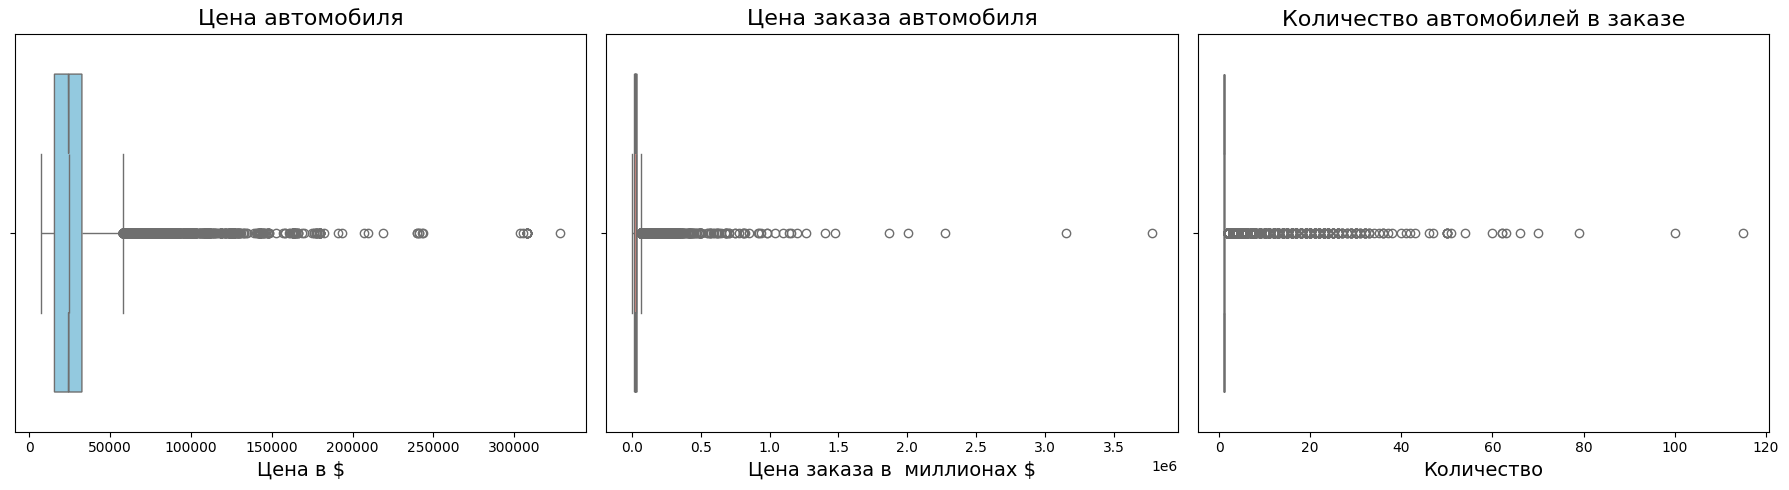

In [77]:

# Создаем сетку для 1 строки и 3 столбцов
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 'Цена_USD'
sns.boxplot(x='Цена_USD', data=df, color='skyblue', notch=True, ax=axes[0])
axes[0].set_xlabel('Цена в $', fontsize=14)
axes[0].set_title('Цена автомобиля', fontsize=16)

# 'Цена_заказа_USD'
sns.boxplot(x='Цена_заказа_USD', data=df, color='salmon', notch=True, ax=axes[1])
axes[1].set_xlabel('Цена заказа в  миллионах $', fontsize=14)
axes[1].set_title('Цена заказа автомобиля', fontsize=16)

#  'Количество'
sns.boxplot(x='Количество', data=df, color='lightcoral', notch=True, ax=axes[2])
axes[2].set_xlabel('Количество', fontsize=14)
axes[2].set_title('Количество автомобилей в заказе', fontsize=16)

plt.tight_layout()
plt.show()

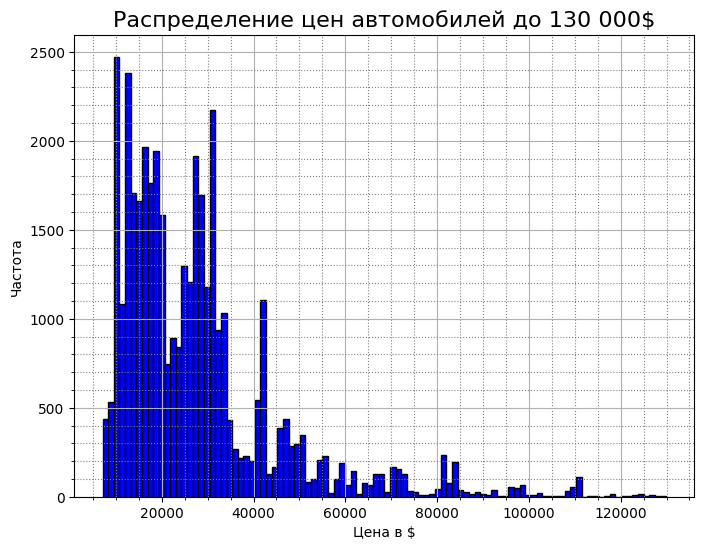

In [78]:

plt.figure(figsize=(8,6))
plt.hist(df[df['Цена_USD'] < 130000]['Цена_USD'], bins=100,facecolor='blue', edgecolor='black')
plt.xlabel('Цена в $')
plt.ylabel('Частота')
plt.title('Распределение цен автомобилей до 130 000$', fontsize=16)
plt.grid()
plt.minorticks_on()
plt.grid(which='minor',
        color = 'gray',
        linestyle = ':')
plt.show()

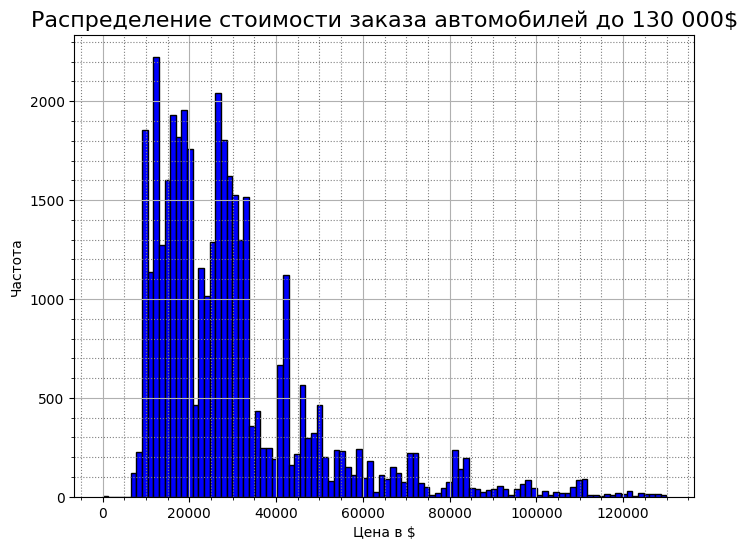

In [79]:
plt.figure(figsize=(8,6))
plt.hist(df[df['Цена_заказа_USD'] < 130000]['Цена_заказа_USD'], bins=100,facecolor='blue', edgecolor='black')
plt.xlabel('Цена в $')
plt.ylabel('Частота')
plt.title('Распределение стоимости заказа автомобилей до 130 000$', fontsize=16)
plt.grid()
plt.minorticks_on()
plt.grid(which='minor',
        color = 'gray',
        linestyle = ':')
plt.show()

#### Ёмкость рынка

In [80]:
print(f"Ёмкость авторынка Казахстана с мая по сентябрь 2019 года в количестве проданных автомобилей составила {df['Количество'].sum()}")
print(f"Ёмкость в долларах США за этот же период составила {(df['Цена_заказа_USD'].sum()/ 1000000000):,.2f} миллиарда")

Ёмкость авторынка Казахстана с мая по сентябрь 2019 года в количестве проданных автомобилей составила 53876
Ёмкость в долларах США за этот же период составила 1.35 миллиарда


#### Марки автомобилей - Лидеры рынка

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39966 entries, 0 to 39965
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Год                   39966 non-null  int64         
 1   Месяц                 39966 non-null  int64         
 2   Компания              39966 non-null  object        
 3   Бренд                 39966 non-null  object        
 4   Модель                39966 non-null  object        
 5   Модификация           36375 non-null  object        
 6   Год_выпуска           39465 non-null  Int64         
 7   Страна-производитель  39966 non-null  object        
 8   Вид_топлива           39966 non-null  object        
 9   Объём_двиг_литры      39463 non-null  float64       
 10  Коробка_передач       39966 non-null  object        
 11  Тип_привода           39966 non-null  object        
 12  Сегмент               33205 non-null  object        
 13  Регион          

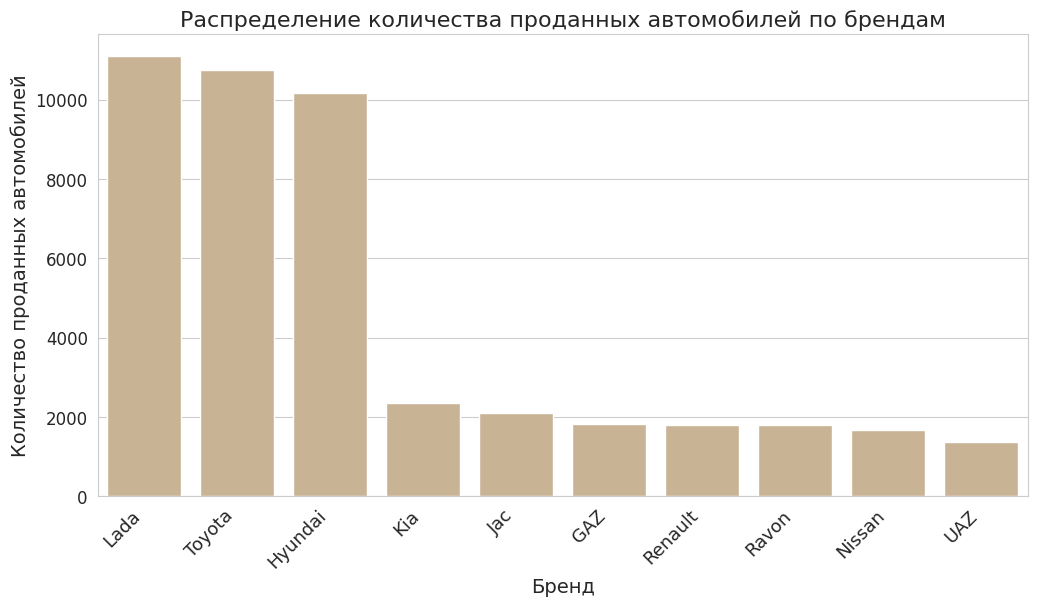

In [82]:
# Группировка данных по модели и суммирование количества для каждой марке
brand_sum = df.groupby('Бренд')['Количество'].sum().sort_values(ascending=False).head(10).reset_index()


plt.figure(figsize=(12, 6))
sns.barplot(x='Бренд', y='Количество', data=brand_sum, color='Tan')
plt.title('Распределение количества проданных автомобилей по брендам', fontsize=16)
plt.xlabel('Бренд', fontsize=14)
plt.ylabel('Количество проданных автомобилей', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=13)
plt.yticks(fontsize=12)
plt.show()

Лидерами являются Lada, Toyota и Hyundai. Опережение примерно в 4-5 раз тех брендов, которые занимают четвёртое место и ниже.

In [83]:
# Смотрю количество значений, чтобы увидеть количество пропусков

df['Тип_клиента'].value_counts()

физ_лицо    30063
юр_лицо      9897
Name: Тип_клиента, dtype: int64

#### Динамика рынка

In [84]:
# Подготовил таблицу для графика динамики продаж

dinamic_sales = df.query('Тип != "unknown"').groupby(['Дата_продажи', 'Тип'])['Количество'].sum().reset_index()

# Отдельно смотрим юр и физ лиц

dinamic_sales_corp = df.query('Тип != "unknown" & Тип_клиента =="юр_лицо"').groupby(['Дата_продажи', 'Тип'])['Количество'].sum().reset_index()
dinamic_sales_nocorp = df.query('Тип != "unknown" & Тип_клиента =="физ_лицо"').groupby(['Дата_продажи', 'Тип'])['Количество'].sum().reset_index()

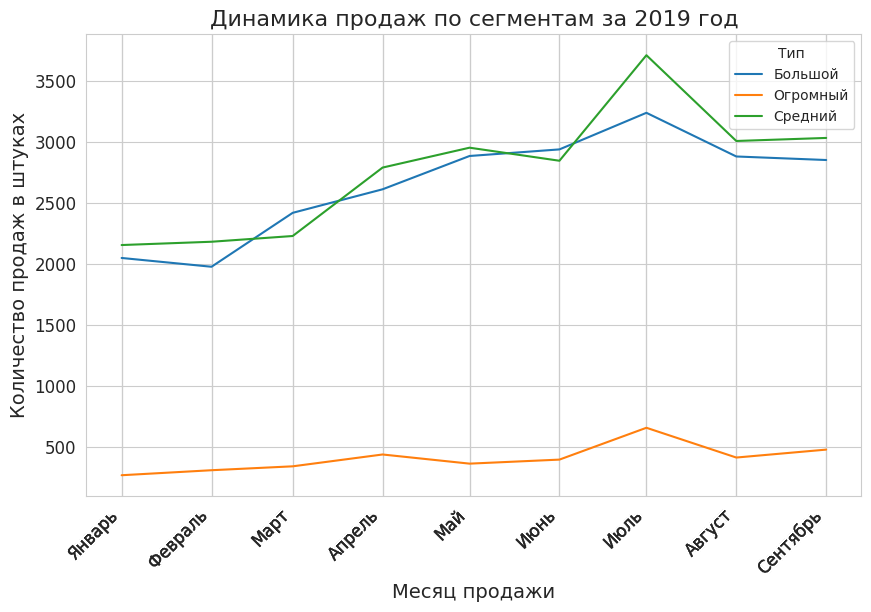

In [85]:
month_dict = {
    '2019-01': 'Январь',
    '2019-02': 'Февраль',
    '2019-03': 'Март',
    '2019-04': 'Апрель',
    '2019-05': 'Май',
    '2019-06': 'Июнь',
    '2019-07': 'Июль',
    '2019-08': 'Август',
    '2019-09': 'Сентябрь',
}


plt.figure(figsize=(10, 6))
sns.lineplot(x='Дата_продажи', y='Количество', hue='Тип', data=dinamic_sales)
plt.title('Динамика продаж по сегментам за 2019 год', fontsize=16)
plt.xlabel('Месяц продажи', fontsize=14)
plt.ylabel('Количество продаж в штуках', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(dinamic_sales['Дата_продажи'], dinamic_sales['Дата_продажи']\
           .dt.strftime('%Y-%m').replace(month_dict), rotation=45, ha='right', fontsize=12)
plt.legend(title='Тип')
plt.show()

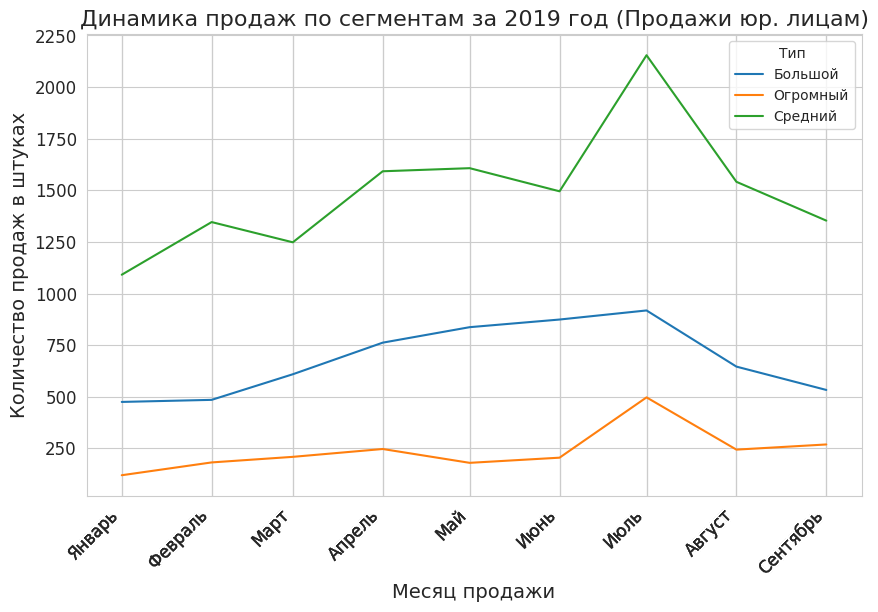

In [86]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Дата_продажи', y='Количество', hue='Тип', data=dinamic_sales_corp)
plt.title('Динамика продаж по сегментам за 2019 год (Продажи юр. лицам)', fontsize=16)
plt.xlabel('Месяц продажи', fontsize=14)
plt.ylabel('Количество продаж в штуках', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(dinamic_sales['Дата_продажи'], dinamic_sales['Дата_продажи'].dt.strftime('%Y-%m').replace(month_dict), rotation=45, ha='right', fontsize=12)
plt.legend(title='Тип')
plt.show()

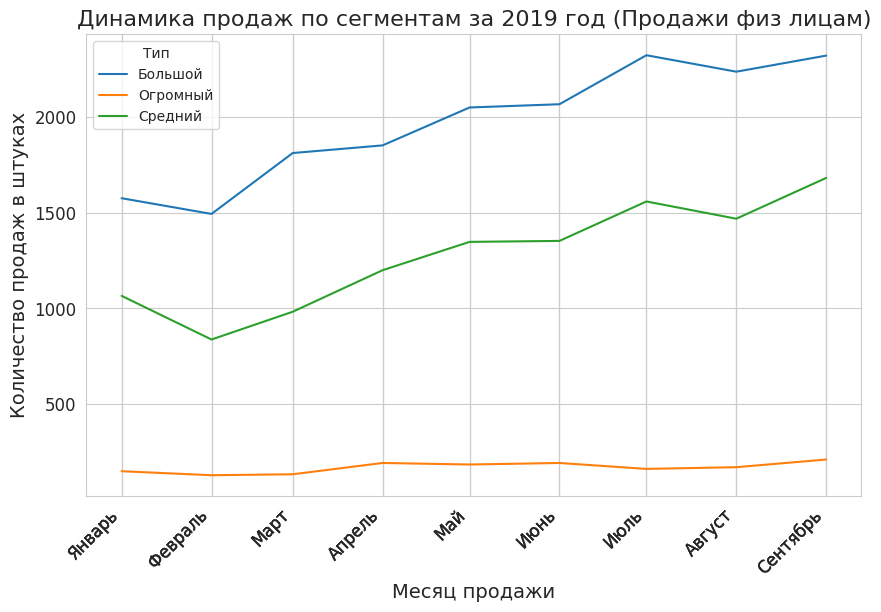

In [87]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Дата_продажи', y='Количество', hue='Тип', data=dinamic_sales_nocorp)
plt.title('Динамика продаж по сегментам за 2019 год (Продажи физ лицам)', fontsize=16)
plt.xlabel('Месяц продажи', fontsize=14)
plt.ylabel('Количество продаж в штуках', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(dinamic_sales['Дата_продажи'], dinamic_sales['Дата_продажи'].dt.strftime('%Y-%m').replace(month_dict), rotation=45, ha='right', fontsize=12)
plt.legend(title='Тип')
plt.show()

Популярностью пользуются Средний и большой сегмент автомобилей, что логично при том, что крупнолитражные автомобили имеют больше коммерческое назначение.

Видно, что активность повышается к середине лета. Но если смотреть в разбивке по типу клиента, то видно, что летний пик происходит именно у юридических лиц, а физические лица просто чаще начинают покупать автомобили начиная с минимальных показателей в зимние месяцы.

У нас один и то не полный год, но можно сделать предположение, что такая цикличность может быть постоянной.

In [88]:
# Собираю таблицы динамики, только уже не в штуках проданных автомобилей, по выручке.

dinamic_sales_money = df.query('Тип != "unknown"').groupby(['Дата_продажи', 'Тип'])['Цена_заказа_USD'].sum().reset_index()
dinamic_sales_money_corp = df.query('Тип != "unknown" & Тип_клиента =="юр_лицо"').groupby(['Дата_продажи', 'Тип'])['Цена_заказа_USD'].sum().reset_index()
dinamic_sales_money_nocorp = df.query('Тип != "unknown" & Тип_клиента =="физ_лицо"').groupby(['Дата_продажи', 'Тип'])['Цена_заказа_USD'].sum().reset_index()

# Для удобства перевожу из долларов в миллионы долларов
dinamic_sales_money['Цена_заказа_USD'] = dinamic_sales_money['Цена_заказа_USD'] / 1000000
dinamic_sales_money_corp['Цена_заказа_USD'] = dinamic_sales_money_corp['Цена_заказа_USD'] / 1000000
dinamic_sales_money_nocorp['Цена_заказа_USD'] = dinamic_sales_money_nocorp['Цена_заказа_USD'] / 1000000

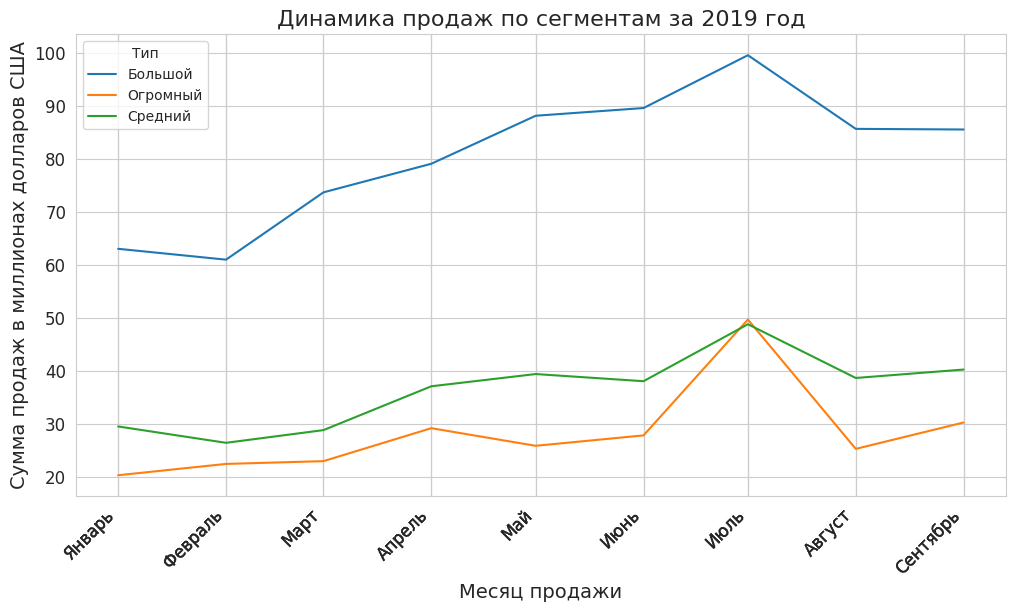

In [89]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Дата_продажи', y='Цена_заказа_USD', hue='Тип', data=dinamic_sales_money)
plt.title('Динамика продаж по сегментам за 2019 год', fontsize=16)
plt.xlabel('Месяц продажи', fontsize=14)
plt.ylabel('Сумма продаж в миллионах долларов США', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(dinamic_sales['Дата_продажи'], dinamic_sales['Дата_продажи'].dt.strftime('%Y-%m').replace(month_dict), rotation=45, ha='right', fontsize=12)
plt.legend(title='Тип')
plt.show()

Мы видим, что если считать в деньгах, динамика примерно такая же, но в сегменте крупнолитражных автомобилей за счёт высокой цены заказа по стоимости в июле даже опережают средний сегмент.

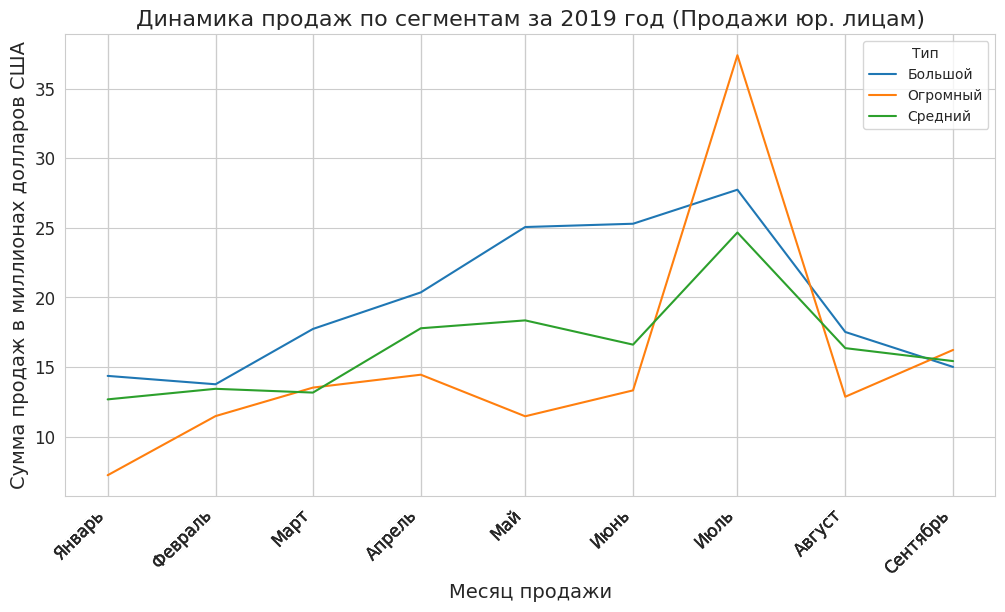

In [90]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Дата_продажи', y='Цена_заказа_USD', hue='Тип', data=dinamic_sales_money_corp)
plt.title('Динамика продаж по сегментам за 2019 год (Продажи юр. лицам)', fontsize=16)
plt.xlabel('Месяц продажи', fontsize=14)
plt.ylabel('Сумма продаж в миллионах долларов США', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(dinamic_sales['Дата_продажи'], dinamic_sales['Дата_продажи'].dt.strftime('%Y-%m').replace(month_dict), rotation=45, ha='right', fontsize=12)
plt.legend(title='Тип')
plt.show()

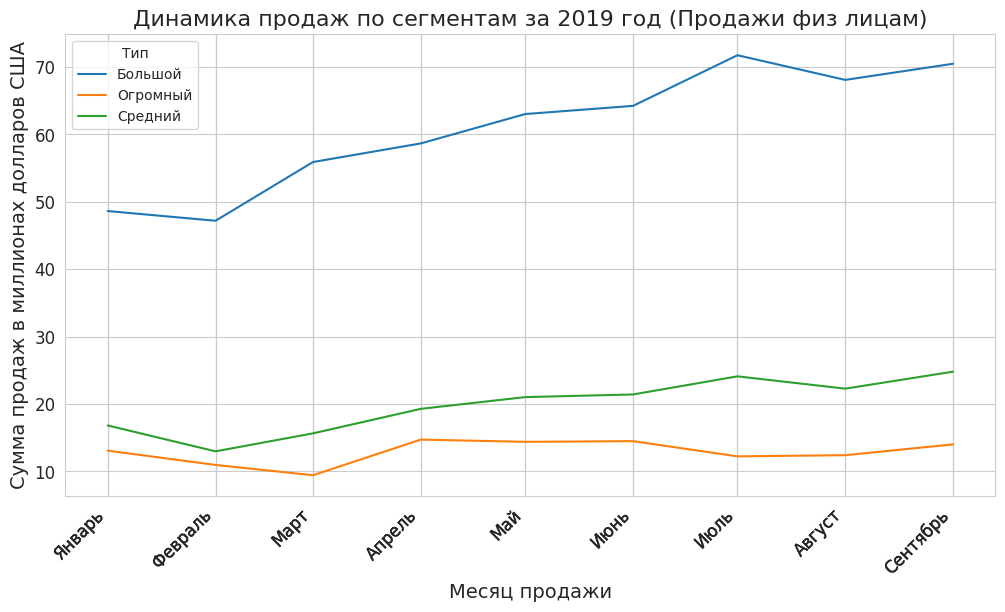

In [91]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Дата_продажи', y='Цена_заказа_USD', hue='Тип', data=dinamic_sales_money_nocorp)
plt.title('Динамика продаж по сегментам за 2019 год (Продажи физ лицам)', fontsize=16)
plt.xlabel('Месяц продажи', fontsize=14)
plt.ylabel('Сумма продаж в миллионах долларов США', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(dinamic_sales['Дата_продажи'], dinamic_sales['Дата_продажи'].dt.strftime('%Y-%m').replace(month_dict), rotation=45, ha='right', fontsize=12)
plt.legend(title='Тип')
plt.show()

У физических лиц всё достаточно плавно и график повторяет динамику в количестве штук.

По юр. лицам общая динамика тоже повторяется однако видно, что за счёт увеличивающихся продаж крупнолитражной техники выручка по этому сегменту в июле опережает другие сегменты.

#### Продажи автомобилей в разрезе бренд / сегмент

In [92]:
# создание таблиц для построения графиков по сегментам

medium = df.query('Тип == "Средний"').groupby('Бренд')['Количество'].sum().reset_index().sort_values(by='Количество', ascending=False).head(10)
big = df.query('Тип == "Большой"').groupby('Бренд')['Количество'].sum().reset_index().sort_values(by='Количество', ascending=False).head(10)
huge = df.query('Тип == "Огромный"').groupby('Бренд')['Количество'].sum().reset_index().sort_values(by='Количество', ascending=False).head(10)

# Таблицы для анализа топа марок по сегментам в долларах

medium_money = df.query('Тип == "Средний"').groupby('Бренд')['Цена_заказа_USD'].sum().reset_index().sort_values(by='Цена_заказа_USD', ascending=False).head(10)
medium_money['Цена_заказа_USD'] = medium_money['Цена_заказа_USD'] / 1000000
big_money = df.query('Тип == "Большой"').groupby('Бренд')['Цена_заказа_USD'].sum().reset_index().sort_values(by='Цена_заказа_USD', ascending=False).head(10)
big_money['Цена_заказа_USD'] = big_money['Цена_заказа_USD'] / 1000000
huge_money = df.query('Тип == "Огромный"').groupby('Бренд')['Цена_заказа_USD'].sum().reset_index().sort_values(by='Цена_заказа_USD', ascending=False).head(10)
huge_money['Цена_заказа_USD'] = huge_money['Цена_заказа_USD'] / 1000000

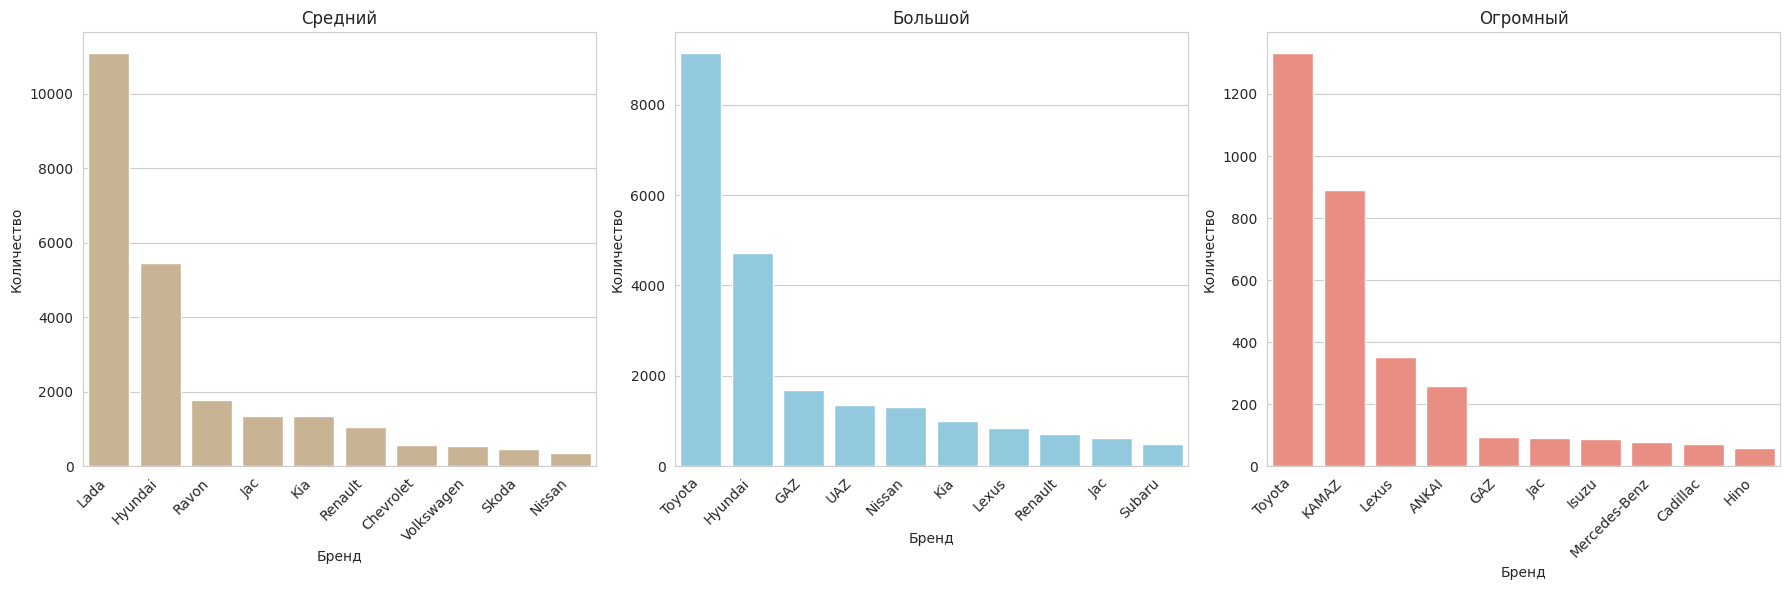

In [93]:
# Кооличество автомобилей

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))


sns.barplot(x='Бренд', y='Количество', data=medium, color='Tan', ax=axes[0])
axes[0].set_title('Средний')
axes[0].set_xlabel('Бренд')
axes[0].set_ylabel('Количество')
axes[0].set_xticks(range(len(medium)))
axes[0].set_xticklabels(medium['Бренд'], rotation=45, ha='right')


sns.barplot(x='Бренд', y='Количество', data=big, color='SkyBlue', ax=axes[1])
axes[1].set_title('Большой')
axes[1].set_xlabel('Бренд')
axes[1].set_ylabel('Количество')
axes[1].set_xticks(range(len(big)))
axes[1].set_xticklabels(big['Бренд'], rotation=45, ha='right')


sns.barplot(x='Бренд', y='Количество', data=huge, color='Salmon', ax=axes[2])
axes[2].set_title('Огромный')
axes[2].set_xlabel('Бренд')
axes[2].set_ylabel('Количество')
axes[2].set_xticks(range(len(huge)))
axes[2].set_xticklabels(huge['Бренд'], rotation=45, ha='right')

plt.tight_layout()
plt.show();

**Выводы по сегментам:**

- "Средний" сегмент(ТОП 3): **Lada, Hyundai, Ravon**
- "Большой" сегмент (ТОП 3): **Toyota, Hyundai, GAZ**
- "Огромный" сегмент (ТОП 3): **Toyota, KAVAZ, Lexus**

В ТОПе 3 в разных сегментах ситуация похожая. Лидеры сильно отрываются почти в 2 раза от второго места.



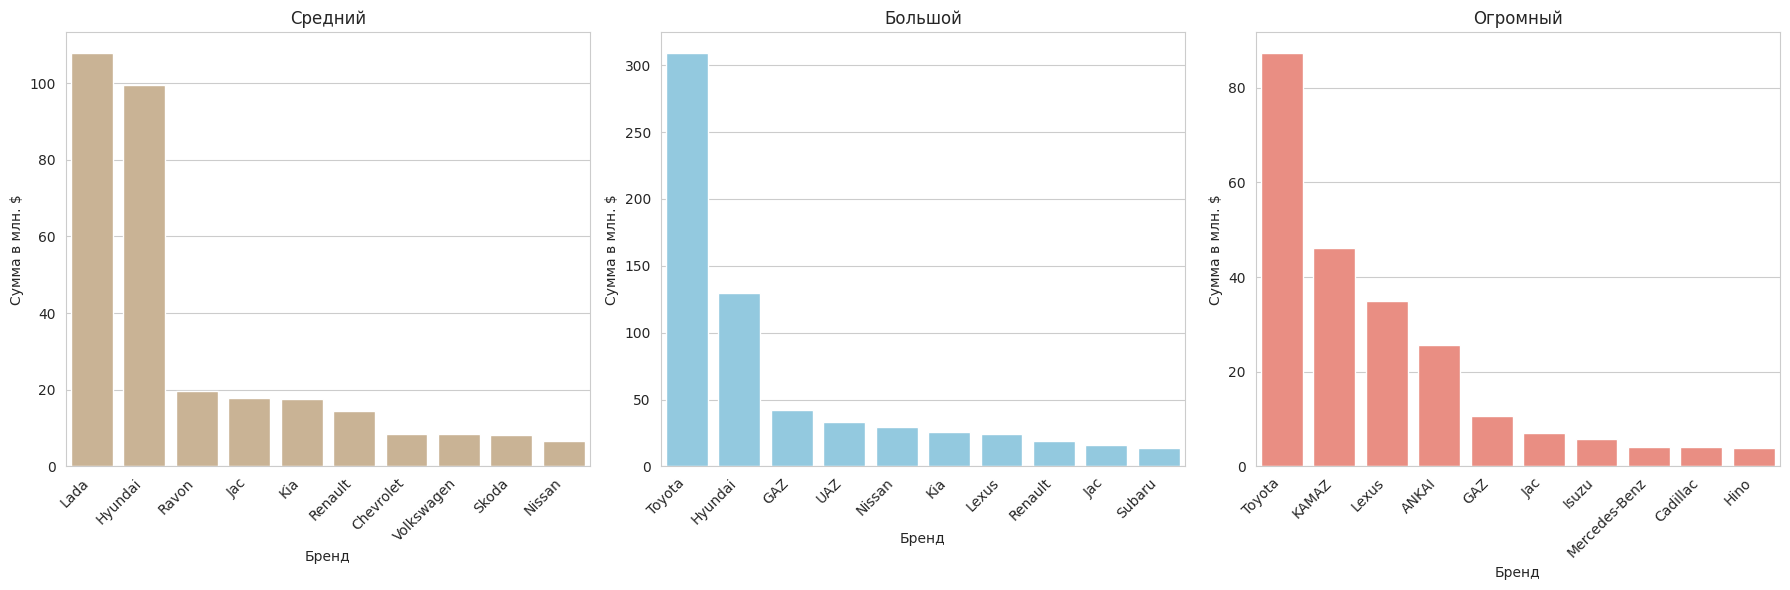

In [94]:
# Выручка


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))


sns.barplot(x='Бренд', y='Цена_заказа_USD', data=medium_money, color='Tan', ax=axes[0])
axes[0].set_title('Средний')
axes[0].set_xlabel('Бренд')
axes[0].set_ylabel('Сумма в млн. $')
axes[0].set_xticks(range(len(medium)))
axes[0].set_xticklabels(medium['Бренд'], rotation=45, ha='right')


sns.barplot(x='Бренд', y='Цена_заказа_USD', data=big_money, color='SkyBlue', ax=axes[1])
axes[1].set_title('Большой')
axes[1].set_xlabel('Бренд')
axes[1].set_ylabel('Сумма в млн. $')
axes[1].set_xticks(range(len(big)))
axes[1].set_xticklabels(big['Бренд'], rotation=45, ha='right')


sns.barplot(x='Бренд', y='Цена_заказа_USD', data=huge_money, color='Salmon', ax=axes[2])
axes[2].set_title('Огромный')
axes[2].set_xlabel('Бренд')
axes[2].set_ylabel('Сумма в млн. $')
axes[2].set_xticks(range(len(huge)))
axes[2].set_xticklabels(huge['Бренд'], rotation=45, ha='right')

plt.tight_layout()
plt.show();

#### Продажи по регионам

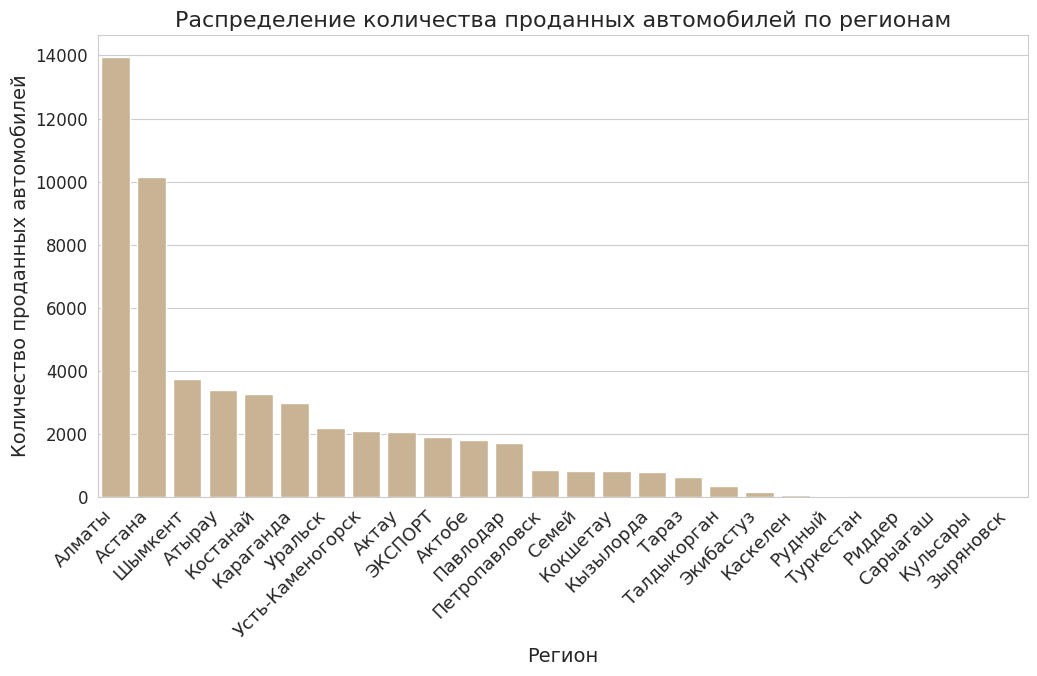

In [95]:
region_sum = df.groupby('Регион')['Количество'].sum().sort_values(ascending=False).reset_index()


plt.figure(figsize=(12, 6))
sns.barplot(x='Регион', y='Количество', data=region_sum, color='Tan')
plt.title('Распределение количества проданных автомобилей по регионам', fontsize=16)
plt.xlabel('Регион', fontsize=14)
plt.ylabel('Количество проданных автомобилей', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=13)
plt.yticks(fontsize=12)
plt.show()

#### Продажи по типу рынка

In [96]:
# Создаем новый столбец на основе столбца 'Регион'

df['Тип_рынка'] = np.where(df['Регион'] == 'ЭКСПОРТ', 'Экспорт', 'Внутренний рынок')

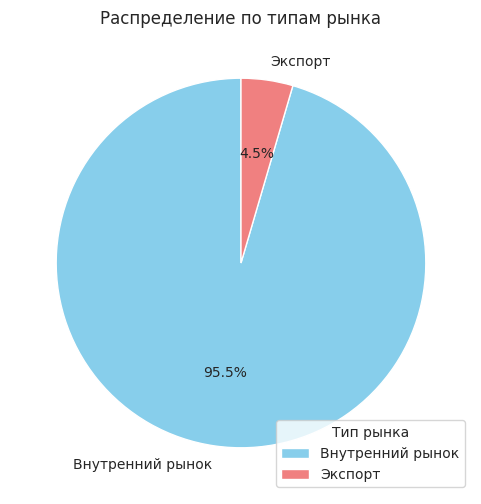

In [97]:
# Группируем данные по столбцу 'Тип_рынка'
market_type_counts = df['Тип_рынка'].value_counts()

# Цвета
colors = ['skyblue', 'lightcoral']

# Размер
plt.figure(figsize=(6, 6))

plt.pie(market_type_counts, labels=market_type_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)

# Легенда
plt.legend(title='Тип рынка', loc='lower right')

# Заголовок
plt.title('Распределение по типам рынка')


plt.show()

#### Продажи по моделям автомобилей

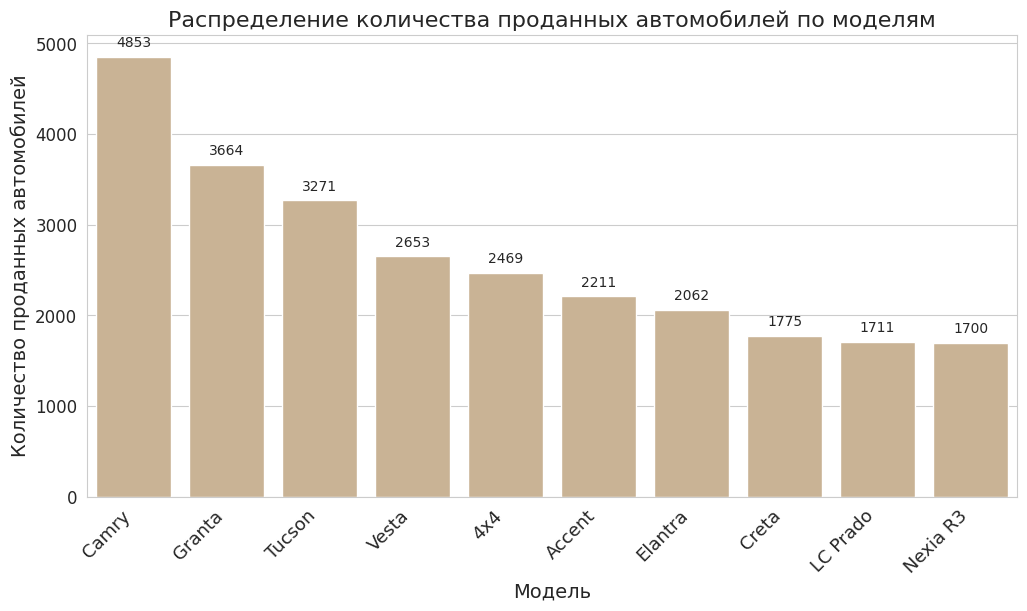

In [98]:
model_sum = df.groupby('Модель')['Количество'].sum().sort_values(ascending=False).reset_index().head(10)


plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Модель', y='Количество', data=model_sum, color='Tan')
plt.title('Распределение количества проданных автомобилей по моделям', fontsize=16)
plt.xlabel('Модель', fontsize=14)
plt.ylabel('Количество проданных автомобилей', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=13)
plt.yticks(fontsize=12)

# Добавление значений Количество внутри столбцов
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.show()

#### Проверка гипотезы: зависит ли стоимость автомобиля зависит от уровня развития региона (средней заработной платы по региону)

In [99]:
df['Область'].unique()

array(['г.Алматы', 'г.Астана', 'Восточно-Казахстанская область',
       'Западно-Казахстанская область', 'Костанайская область',
       'Павлодарская область', 'Южно-Казахстанская область',
       'Мангистауская область', 'Атырауская область',
       'Актюбинская область', 'Карагандинская область',
       'Северо-Казахстанская область', 'Акмолинская область',
       'Кызылординская область', 'Жамбылская область',
       'Туркестанская область', 'Алматинская область', 'Экспорт область'],
      dtype=object)

[Источник информации о средней заработной платы в 2019 году](https://ranking.kz/reviews/industries/mediannaya-i-modalnaya-zarabotnaya-plata-2019.html)

In [100]:
# Создаю словарь где каждой области соответсвует значение средней заработной платы
# Спарсить данные нельзя было, они были в картинках

median_salary = {'г.Алматы': 248668, 'Алматинская область': 150509, 'г.Астана': 308135,
                 'Восточно-Казахстанская область': 183005,
                 'Западно-Казахстанская область':201945, 'Костанайская область': 161622,
                 'Павлодарская область':177402, 'Абайская область': 'unknown',
                 'Южно-Казахстанская область': 152659, 'Мангистауская область':309102,
                 'Атырауская область':345227, 'Актюбинская область':169884,
                 'Карагандинская область': 189450, 'Северо-Казахстанская область':141049,
                 'Акмолинская область': 156438, 'Кызылординская область': 159421,
                 'Жамбылская область':139977, 'Туркестанская область': 138124}

In [101]:
# При поиске информации, увидел, что не верно указан город Семей

df[['Регион', 'Область']].query('Регион == "Семей"').head()

,Регион,Область
234,Семей,Восточно-Казахстанская область
238,Семей,Восточно-Казахстанская область
254,Семей,Восточно-Казахстанская область
256,Семей,Восточно-Казахстанская область
263,Семей,Восточно-Казахстанская область


In [102]:
# Исправляю регион на основе города

df.loc[df['Регион'] == 'Семей', 'Область'] = 'Абайская область'

In [103]:
# Создаю новый столбец на основе ранее подготовленного словаря

df['ЗП_средняя'] = df['Область'].apply(lambda cell: median_salary.get(cell, cell))

In [104]:
df['ЗП_средняя'].unique()

array([248668, 308135, 183005, 201945, 161622, 177402, 'unknown', 152659,
       309102, 345227, 169884, 189450, 141049, 156438, 159421, 139977,
       138124, 150509, 'Экспорт область'], dtype=object)

In [105]:
# Исключаю те значения, которые мне не нужны для анализа

df_salary = df.query('ЗП_средняя != "Экспорт область" & ЗП_средняя != "unknown" & Тип_клиента == "физ_лицо"')

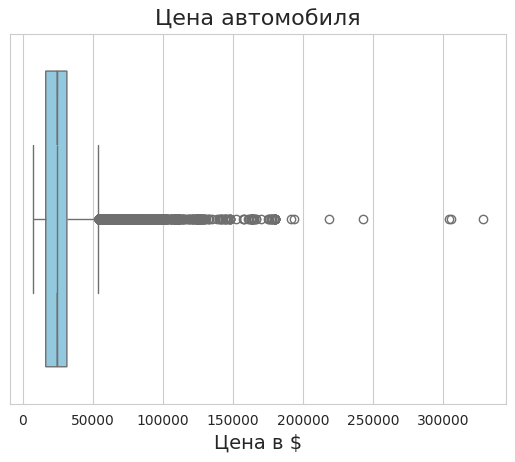

In [106]:
# анализирую выбросы

sns.boxplot(x='Цена_USD', data=df_salary, color='skyblue', notch=True)

plt.xlabel('Цена в $', fontsize=14)

plt.title('Цена автомобиля', fontsize=16)

plt.show()

In [107]:
# Определяю квантили

q1 = df_salary['Цена_USD'].quantile(0)
q2 = df_salary['Цена_USD'].quantile(0.95)


In [108]:
# Отрезаю выборсы

df_salary = df_salary[df_salary['Цена_USD'].between(q1, q2)]

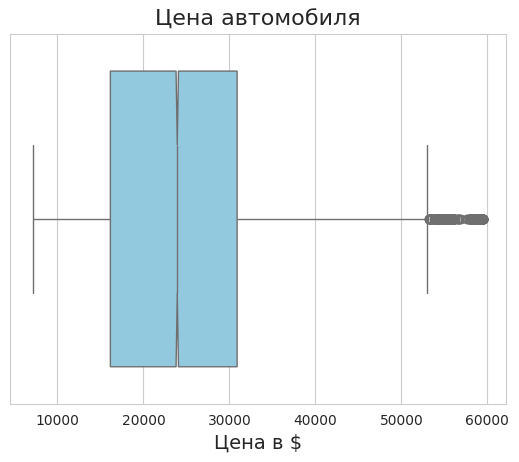

In [109]:
# Проверяю

sns.boxplot(x='Цена_USD', data=df_salary, color='skyblue', notch=True)

plt.xlabel('Цена в $', fontsize=14)

plt.title('Цена автомобиля', fontsize=16)

plt.show()

In [110]:
# Перевожу тенге в доллары США по курсу 1 доллар = 446 тенге

df_salary['ЗП_средняя']= df_salary['ЗП_средняя'].astype(float) / 446

In [111]:
 # Получаю таблицу со средней заработной платой и средней ценой автомобилея по регионам

 group_salary = df_salary.groupby(['Область', 'ЗП_средняя'])['Цена_USD'].mean().reset_index()
 group_salary

,Область,ЗП_средняя,Цена_USD
0,Акмолинская область,350.76,18556.61
1,Актюбинская область,380.91,24145.16
2,Алматинская область,337.46,18577.28
3,Атырауская область,774.05,24283.37
4,Восточно-Казахстанская область,410.33,23389.58
5,Жамбылская область,313.85,16767.96
6,Западно-Казахстанская область,452.79,24011.61
7,Карагандинская область,424.78,22985.04
8,Костанайская область,362.38,22707.34
9,Кызылординская область,357.45,16440.33


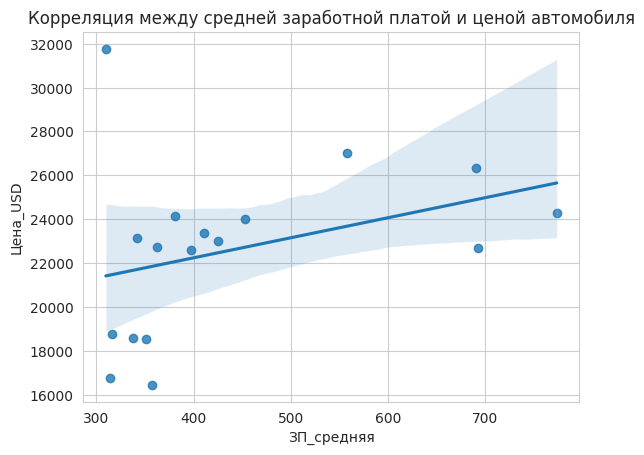

In [112]:
sns.regplot(x='ЗП_средняя', y='Цена_USD', data=group_salary)
plt.title('Корреляция между средней заработной платой и ценой автомобиля')
plt.xlabel('ЗП_средняя')
plt.ylabel('Цена_USD')
plt.show()

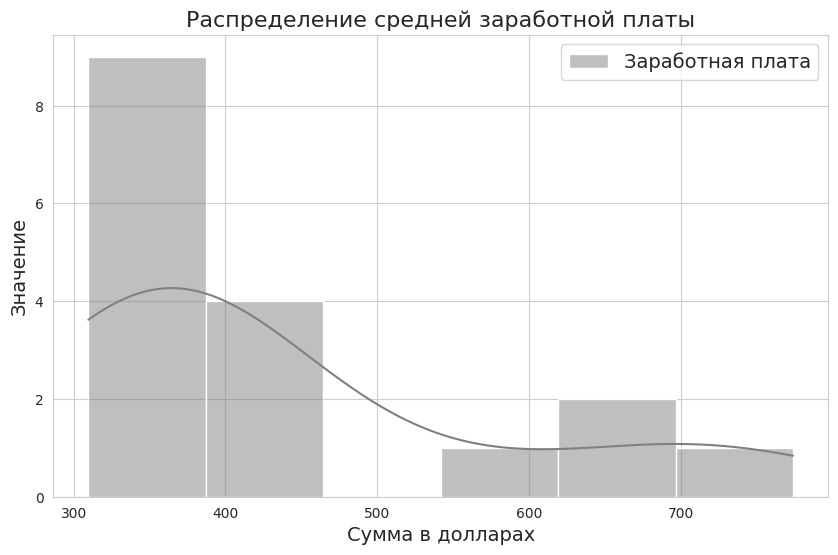

In [113]:
# Распределение ЗП

plt.figure(figsize=(10, 6))
sns.color_palette("pastel")
sns.histplot(group_salary['ЗП_средняя'], kde=True,  color='grey', label='Заработная плата')

plt.title('Распределение средней заработной платы', fontsize=16)
plt.xlabel('Сумма в долларах', fontsize=14)
plt.ylabel('Значение', fontsize=14)
plt.ticklabel_format(style='plain', axis='x', useOffset=False)

plt.legend(fontsize=14)
plt.grid(True)
plt.show()

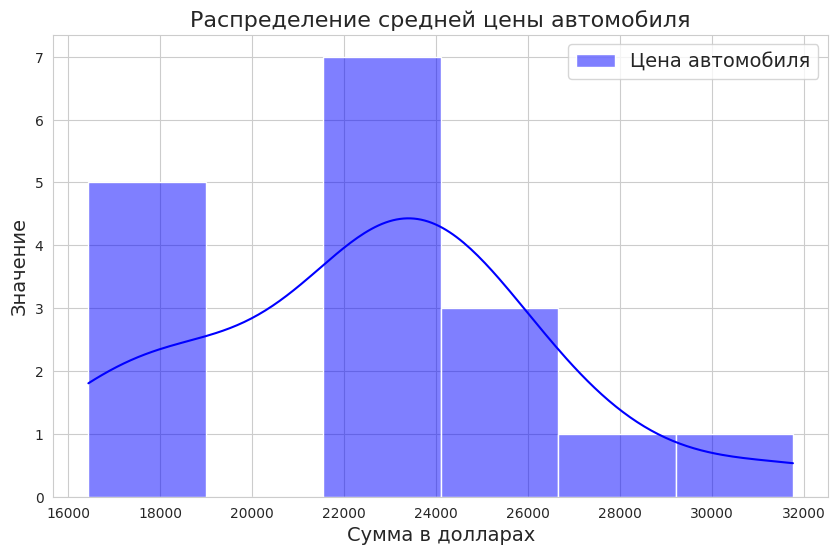

In [114]:
# Рапсределение средней цены авто

plt.figure(figsize=(10, 6))
sns.color_palette("pastel")

sns.histplot(group_salary['Цена_USD'], kde=True,  color='Blue', label='Цена автомобиля')
plt.title('Распределение средней цены автомобиля', fontsize=16)
plt.xlabel('Сумма в долларах', fontsize=14)
plt.ylabel('Значение', fontsize=14)
plt.ticklabel_format(style='plain', axis='x', useOffset=False)

plt.legend(fontsize=14)
plt.grid(True)
plt.show()

**H0:** Зависимости между заработной платой в регионе и ценой автомобилей нет

---



**H1:** Статистически значемая зависимость между заработной платой в регионе и ценой автомобилей существует

In [115]:


# Рассчитываем коэффициент корреляции и p-значение
corr, p_value = spearmanr(group_salary['ЗП_средняя'], group_salary['Цена_USD'])

# Вывод результатов
print(f'Коэффициент корреляции: {corr}')
print(f'p-значение: {p_value}')

# Оценка статистической значимости
alpha = 0.05
if p_value < alpha:
    print('Статистически значимая зависимость')
else:
    print('Отсутствие статистически значимой зависимости')


Коэффициент корреляции: 0.42892156862745107
p-значение: 0.08580101895154528
Отсутствие статистически значимой зависимости


## Анализ положения Меркур Авто:

### Выручка Меркур Авто

#### Общая

In [116]:
# Создаю новую таблицу

mercur = df.query('Компания == "Mercur Auto"')
mercur.head()

,Год,Месяц,Компания,Бренд,Модель,Модификация,Год_выпуска,Страна-производитель,Вид_топлива,Объём_двиг_литры,Коробка_передач,Тип_привода,Сегмент,Регион,Тип_клиента,Количество,Цена_USD,Цена_заказа_USD,Область,Класс_2013,Тип,Дата_продажи,Тип_рынка,ЗП_средняя
0,2019,5,Mercur Auto,Audi,A3,TFSI,2018,Германия,бензин,1.40,робот,fwd,Легковые автомобили Premium,Алматы,физ_лицо,1,28115.00,28115.00,г.Алматы,C класс,Средний,2019-05-01,Внутренний рынок,248668
1,2019,8,Mercur Auto,Audi,A3,TFSI,2018,Германия,бензин,1.40,робот,fwd,Легковые автомобили Premium,Алматы,юр_лицо,1,32246.99,32246.99,г.Алматы,C класс,Средний,2019-08-01,Внутренний рынок,248668
2,2019,4,Mercur Auto,Audi,A4,TFSI,2018,Германия,бензин,1.40,робот,unknown,Легковые автомобили Premium,Алматы,физ_лицо,1,32000.00,32000.00,г.Алматы,D класс,Средний,2019-04-01,Внутренний рынок,248668
3,2019,7,Mercur Auto,Audi,A4,TFSI,2018,Германия,бензин,1.40,робот,fwd,Легковые автомобили Premium,Алматы,юр_лицо,1,31929.00,31929.00,г.Алматы,D класс,Средний,2019-07-01,Внутренний рынок,248668
4,2019,7,Mercur Auto,Audi,A4,TFSI,2018,Германия,бензин,1.40,робот,fwd,Легковые автомобили Premium,Алматы,физ_лицо,1,31929.00,31929.00,г.Алматы,D класс,Средний,2019-07-01,Внутренний рынок,248668


In [117]:
print(f"Общая выручка Mercur Auto составила {mercur['Цена_заказа_USD'].sum()/1000000:,.2f} млн.$")

Общая выручка Mercur Auto составила 19.36 млн.$


#### По брендам

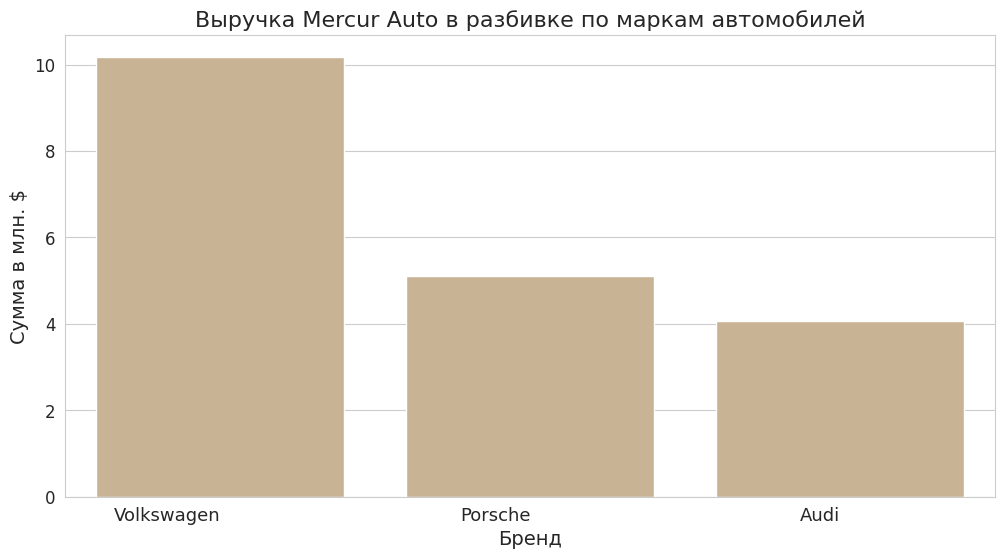

In [118]:
mercur_brand_sum = mercur.groupby('Бренд')['Цена_заказа_USD'].sum().sort_values(ascending=False).reset_index()
mercur_brand_sum['Цена_заказа_USD'] = mercur_brand_sum['Цена_заказа_USD']/1000000

plt.figure(figsize=(12, 6))
sns.barplot(x='Бренд', y='Цена_заказа_USD', data=mercur_brand_sum, color='Tan')
plt.title('Выручка Mercur Auto в разбивке по маркам автомобилей', fontsize=16)
plt.xlabel('Бренд', fontsize=14)
plt.ylabel('Сумма в млн. $', fontsize=14)
plt.xticks(ha='right', fontsize=13)
plt.yticks(fontsize=12)
plt.show()

In [119]:
mercur_brand_sum

,Бренд,Цена_заказа_USD
0,Volkswagen,10.18
1,Porsche,5.11
2,Audi,4.06


#### Средняя выручка

In [120]:
print(f"Средняя выручка со сделки Mercur Auto составила {mercur['Цена_заказа_USD'].mean():,.2f}$")

Средняя выручка со сделки Mercur Auto составила 30,101.52$


#### Ежемесячная выручка

In [121]:
# Произвожу группировку

mercur_month_sum = mercur.groupby('Дата_продажи')['Цена_заказа_USD'].sum().reset_index()
mercur_month_sum['Дата_продажи'] = pd.to_datetime(mercur_month_sum['Дата_продажи'], format='%Y.%m')


mercur_month_sum['Цена_заказа_USD'] = mercur_month_sum['Цена_заказа_USD']/1000000


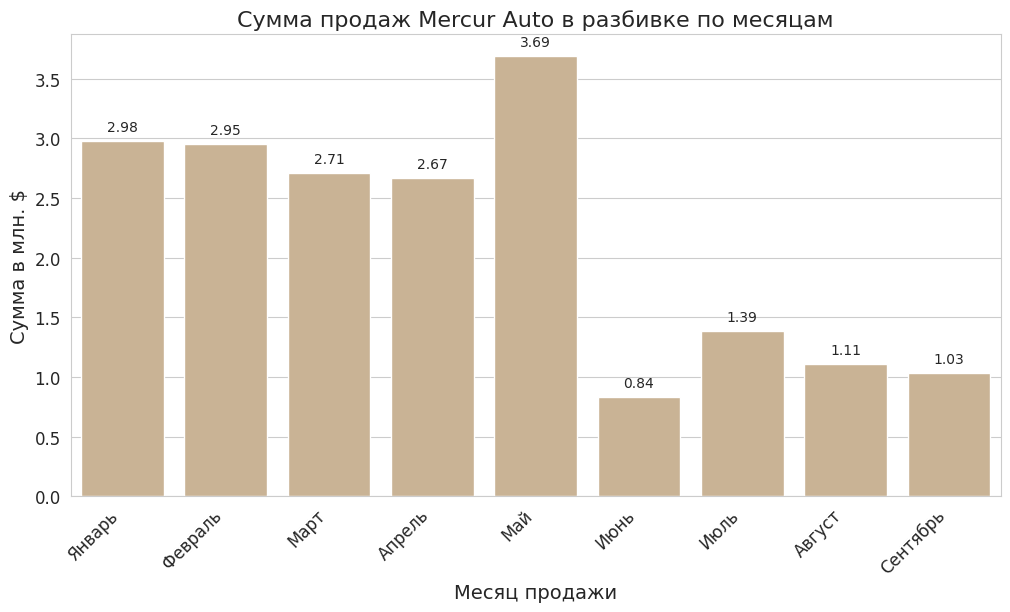

In [122]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Дата_продажи', y='Цена_заказа_USD', data=mercur_month_sum, color='Tan')
plt.title('Сумма продаж Mercur Auto в разбивке по месяцам', fontsize=16)
plt.xlabel('Месяц продажи', fontsize=14)
plt.ylabel('Сумма в млн. $', fontsize=14)
ax.set_xticks(plt.gca().get_xticks())
ax.set_xticklabels(mercur_month_sum['Дата_продажи'].dt.strftime('%Y-%m').replace(month_dict), rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Добавление значений Цена_заказа_USD внутри столбцов
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.show()


#### Ежемесячная выручка по брендам

In [123]:
mercur_month_brand = mercur.groupby(['Дата_продажи', 'Бренд'])['Цена_заказа_USD'].sum().reset_index()
mercur_month_brand['Цена_заказа_USD'] = mercur_month_brand['Цена_заказа_USD'] / 1000


<ipython-input-124-39b17d8be441>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([month_dict_sorted[date] for date in unique_dates_sorted], rotation=45, ha='right', fontsize=12)


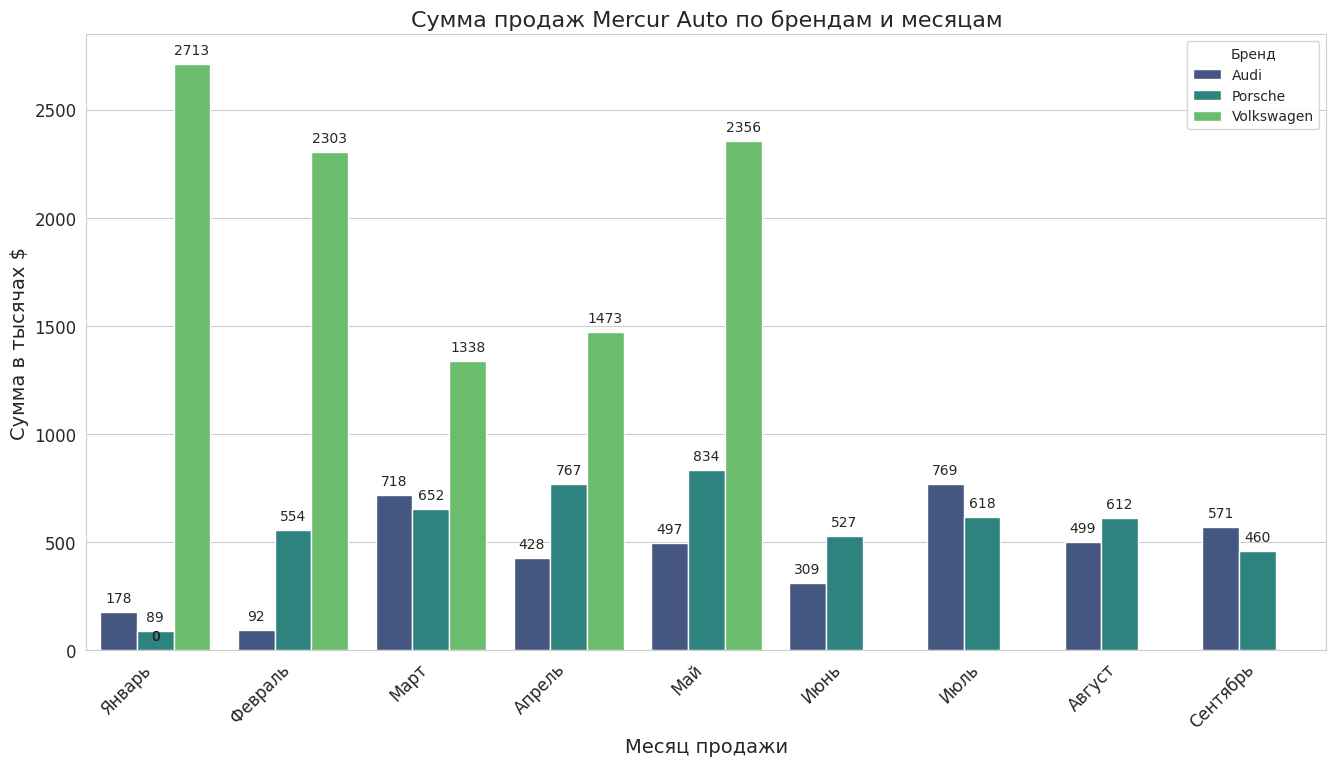

In [124]:
plt.figure(figsize=(16, 8))

# Получение уникальных значений дат и их сортировка
unique_dates = mercur_month_brand['Дата_продажи'].dt.strftime('%Y-%m').unique()
unique_dates_sorted = sorted(unique_dates)

# Создание словаря для замены
month_dict_sorted = {date: month_dict[date] for date in unique_dates_sorted}

ax = sns.barplot(x='Дата_продажи', y='Цена_заказа_USD', hue='Бренд', data=mercur_month_brand, palette='viridis')
plt.title('Сумма продаж Mercur Auto по брендам и месяцам', fontsize=16)
plt.xlabel('Месяц продажи', fontsize=14)
plt.ylabel('Сумма в тысячах $', fontsize=14)

# Замена значений на оси x
ax.set_xticklabels([month_dict_sorted[date] for date in unique_dates_sorted], rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Бренд')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.show()


Ключевой момент в том, что с июня пропали продажи Volkswagen.
В данной работе я это подробно не исследовал.

#### Продажи по регионам

In [125]:
mercur_region_sum = mercur.groupby('Регион')['Количество'].sum().reset_index()

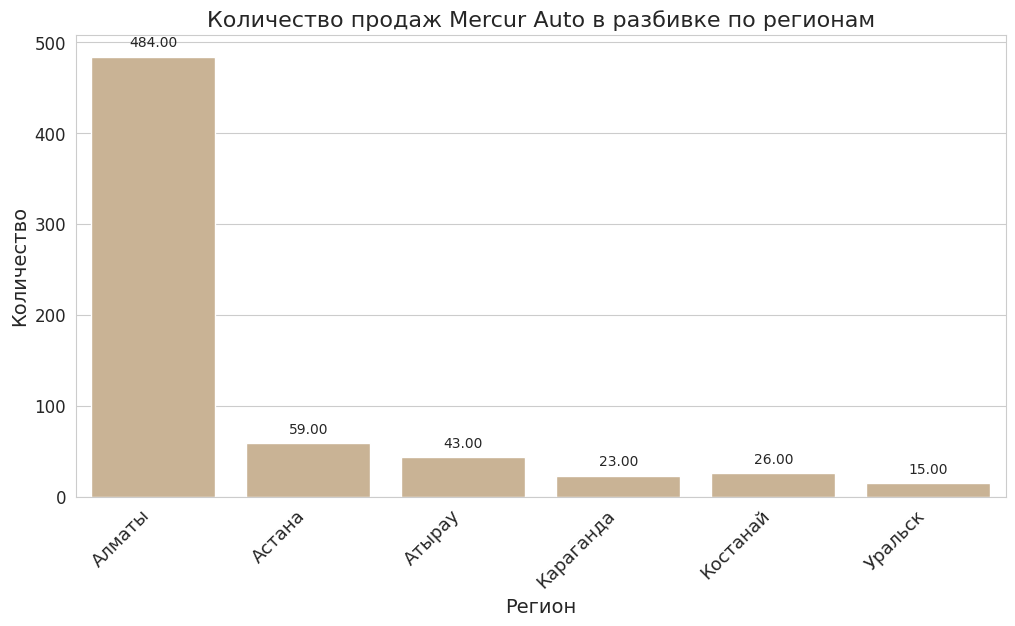

In [126]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Регион', y='Количество', data=mercur_region_sum, color='Tan')
plt.title('Количество продаж Mercur Auto в разбивке по регионам', fontsize=16)
plt.xlabel('Регион', fontsize=14)
plt.ylabel('Количество', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=13)
plt.yticks(fontsize=12)


for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.show()


#### Продажи по региону и брендам

In [127]:
mercur_region_brand = mercur.groupby(['Регион', 'Бренд'])['Количество'].sum().reset_index()


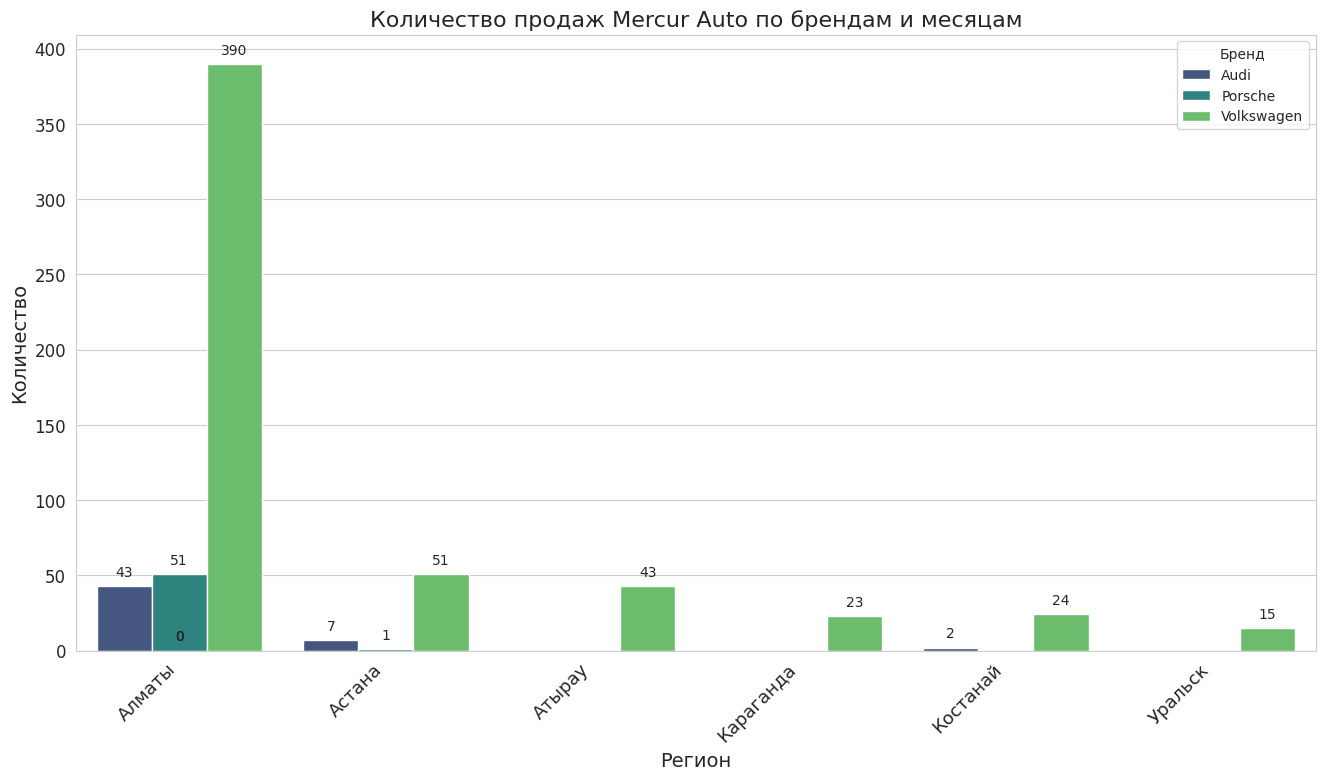

In [128]:
plt.figure(figsize=(16, 8))
ax = sns.barplot(x='Регион', y='Количество', hue='Бренд', data=mercur_region_brand, palette='viridis')
plt.title('Количество продаж Mercur Auto по брендам и месяцам', fontsize=16)
plt.xlabel('Регион', fontsize=14)
plt.ylabel('Количество', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=13)
plt.yticks(fontsize=12)
plt.legend(title='Бренд')


for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.show()


### Конкурентный анализ

In [129]:
# Выявляю конкурентов Mercur Auto

df.query('Бренд =="Volkswagen" | Бренд =="Audi" | Бренд =="Porsche"')['Компания'].unique()

array(['Mercur Auto', 'Volkswagen Group Rus', 'Автодом Motors KST',
       'Автомир-Центр', 'ТОО "Eurasia Motor Zhaik"'], dtype=object)

In [130]:
# Создаю новую таблицу где только конкуренты

competitors = df.query('Бренд =="Volkswagen" | Бренд =="Audi" | Бренд =="Porsche"')

In [131]:
competitors_month_sum = competitors.groupby(['Дата_продажи', 'Компания'])['Количество'].sum().reset_index()
competitors_month_sum['Дата_продажи'] = pd.to_datetime(competitors_month_sum['Дата_продажи'], format='%Y.%m')


In [132]:
competitors_month_sum.head(10)

,Дата_продажи,Компания,Количество
0,2019-01-01,Mercur Auto,165
1,2019-01-01,Автодом Motors KST,18
2,2019-01-01,Автомир-Центр,6
3,2019-01-01,"ТОО ""Eurasia Motor Zhaik""",8
4,2019-02-01,Mercur Auto,126
5,2019-02-01,Автодом Motors KST,16
6,2019-03-01,Mercur Auto,78
7,2019-04-01,Mercur Auto,78
8,2019-04-01,Volkswagen Group Rus,7
9,2019-04-01,Автодом Motors KST,19


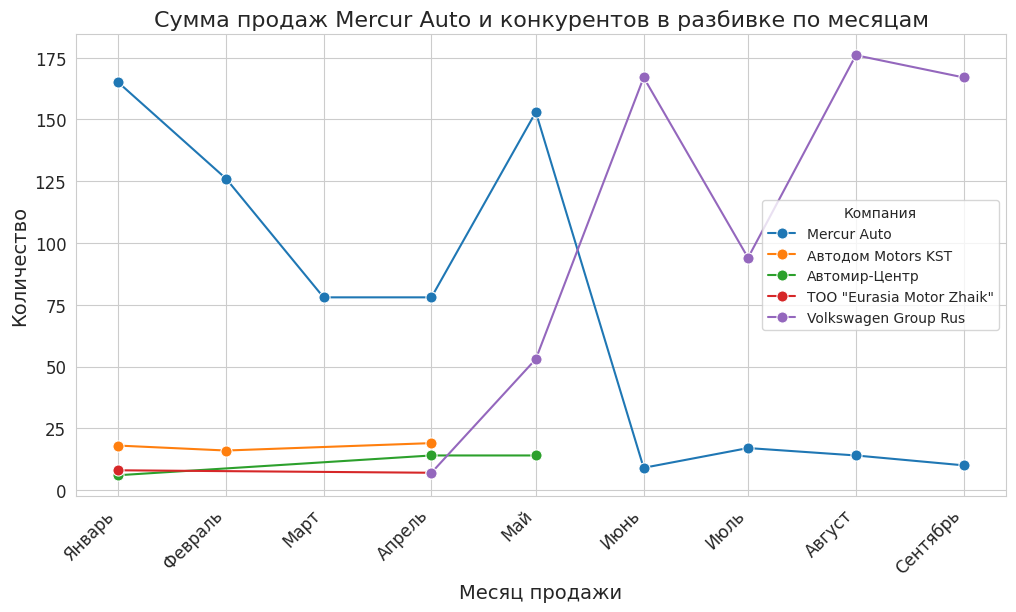

In [133]:
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x='Дата_продажи', y='Количество', hue='Компания', data=competitors_month_sum, marker='o', markersize=8, linestyle='-', color='Tan')
plt.title('Сумма продаж Mercur Auto и конкурентов в разбивке по месяцам', fontsize=16)
plt.xlabel('Месяц продажи', fontsize=14)
plt.ylabel('Количество', fontsize=14)
ax.set_xticks(plt.gca().get_xticks())
ax.set_xticklabels(mercur_month_sum['Дата_продажи'].dt.strftime('%Y-%m').replace(month_dict), rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)


plt.show()



## Выводы

Удалось разобрать достаточно сложные данные.

Результаты:

- Очистка данных произведена и их можно использовать и для других работ
- Гипотеза о том, что стоимость автомобиля зависит от уровня развития региона не подтвердилась, хотя небольшая связь есть. (Коэффицент корреляции 0.45)
- Оценил рынок: в лидерах по брендам это Toyota, Lada и Hyundai.
- Экспорт составлят 4.5% от общего числа продаж.
- Летом возрастает спрос на атомобиле в целом и в частности на коммерческие крупнолитражные автомобили
- Больше всего автомобилей продают в Алматы и Астане
- В июне от Mercur Auto ушли Volkswagen и судя по последнему графику продажами занялся сам концерн. Из-за этого выручка упала в среднем три раза.
- Больше всего Mercur Auto продавал в Алматы.
- Судя по всем Volkswagen Group Rus перехватила инициативу и забрала у всех дилеров возможность продавать Volkswagen